# DATA COLLECTION

In [1]:
#libraries
import pandas as pd 
import numpy as np
import pip
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import scipy.stats as stats
import random
import itertools

from scipy.stats import shapiro, spearmanr, mannwhitneyu, kruskal
from decimal import Decimal


In [2]:
path = "./dataset_project_eHealth20252026.csv"
dataset = pd.read_csv(path)
dataset.head(5)

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 96 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        220 non-null    float64
 1   gender     221 non-null    int64  
 2   education  220 non-null    float64
 3   marital    220 non-null    float64
 4   income     221 non-null    int64  
 5   audit_1    221 non-null    int64  
 6   audit_2    221 non-null    int64  
 7   audit_3    220 non-null    float64
 8   audit_4    221 non-null    int64  
 9   audit_5    220 non-null    float64
 10  audit_6    221 non-null    int64  
 11  audit_7    220 non-null    float64
 12  audit_8    220 non-null    float64
 13  audit_9    220 non-null    float64
 14  audit_10   219 non-null    float64
 15  dast_1     221 non-null    int64  
 16  dast_2     219 non-null    float64
 17  dast_3     220 non-null    float64
 18  dast_4     221 non-null    int64  
 19  dast_5     220 non-null    float64
 20  dast_6    

In [4]:
df = pd.DataFrame(dataset) #dataframe creation

In [5]:
print("Elenco colonne del dataset:")
for i, col in enumerate(df.columns):
    print(f"{i+1:02d}: {col}")

Elenco colonne del dataset:
01: age
02: gender
03: education
04: marital
05: income
06: audit_1
07: audit_2
08: audit_3
09: audit_4
10: audit_5
11: audit_6
12: audit_7
13: audit_8
14: audit_9
15: audit_10
16: dast_1
17: dast_2
18: dast_3
19: dast_4
20: dast_5
21: dast_6
22: dast_7
23: dast_8
24: dast_9
25: dast_10
26: pgsi_1
27: pgsi_2
28: pgsi_3
29: pgsi_4
30: pgsi_5
31: pgsi_6
32: pgsi_7
33: pgsi_8
34: pgsi_9
35: iat_1
36: iat_2
37: iat_3
38: iat_4
39: iat_5
40: iat_6
41: iat_7
42: iat_8
43: iat_9
44: iat_10
45: iat_11
46: iat_12
47: iat_13
48: iat_14
49: iat_15
50: iat_16
51: iat_17
52: iat_18
53: iat_19
54: iat_20
55: pcl5_1
56: pcl5_2
57: pcl5_3
58: pcl5_4
59: pcl5_5
60: pcl5_6
61: pcl5_7
62: pcl5_8
63: pcl5_9
64: pcl5_10
65: pcl5_11
66: pcl5_12
67: pcl5_13
68: pcl5_14
69: pcl5_15
70: pcl5_16
71: pcl5_17
72: pcl5_18
73: pcl5_19
74: pcl5_20
75: mspss_1
76: mspss_2
77: mspss_3
78: mspss_4
79: mspss_5
80: mspss_6
81: mspss_7
82: mspss_8
83: mspss_9
84: mspss_10
85: mspss_11
86: mspss

The dataset has 221 rows and 96 columns.

# DATA CLEANING

Deletion of duplicated rows.

In [6]:
df.duplicated() #check for duplicated rows and delete them

0      False
1      False
2      False
3      False
4      False
       ...  
216     True
217     True
218     True
219     True
220     True
Length: 221, dtype: bool

In [7]:
df = df.drop_duplicates()

In [8]:
df

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,1,1,0.0,0,0.0,...,4,1.0,4.0,0.0,0,0.0,3,3.0,3.0,1.0
196,21.0,0,18.0,1.0,38000,1,1,1.0,0,1.0,...,4,4.0,4.0,4.0,3,3.0,3,2.0,0.0,3.0
197,20.0,1,22.0,4.0,50000,2,2,0.0,2,1.0,...,7,7.0,7.0,1.0,7,3.0,5,5.0,5.0,3.0
198,39.0,0,8.0,1.0,22000,0,4,3.0,2,0.0,...,0,4.0,4.0,4.0,1,1.0,0,3.0,2.0,0.0


The deleted rows are 21, the dataset has 200 rows and 96 columns and it is saved in a new dataset named new_df.

In [9]:
new_df = df.copy()

Replace all different representations of missing or empty values in the DataFrame (e.g., empty strings, "NA", "N/A", "nan", "missing", None, etc.) with a consistent NaN value recognized by pandas for easier data cleaning and analysis.

In [10]:
new_df = new_df.replace(
    ["", " ", "NA", "N/A", "na", "NaN", "nan", "missing", "None", None, pd.NaT, pd.NA],
    np.nan
)

## Handling Missing Values

The dataset contains some missing values. These are not necessarily due to data collection errors — in some cases, they result from the questionnaire structure (skip logic), where certain responses are implicitly determined by previous answers. Therefore, the missing data are assumed to follow a "Missing At Random" (MAR) mechanism rather than being "Missing Completely At Random" (MCAR). 
However, for analytical purposes, we treat them as completely random, assuming no systematic bias is introduced.
Imputation Strategy:
- Categorical variables  -> mode
- Binary variables (0/1) -> mode
- Continuous / Likert-scale variables -> mean if |skew| <= 0.5, else median
- Label columns are excluded from imputation

This approach helps preserve data consistency while minimizing distortion in the overall distribution. Before imputation, null-like string values are normalized to ensure correct detection and replacement.


In [11]:
# helper function to safely get the mode of a series, returning NaN if no mode found
def safe_mode(s):
    m = s.mode(dropna=True)
    return m.iloc[0] if len(m) else np.nan

# 1) define known groups of columns
label_cols = [c for c in new_df.columns if c.endswith("_label") or c.endswith("_labels")]
cat_code_cols = [c for c in ["gender", "education", "marital"] if c in new_df.columns]
binary_cols = [c for c in new_df.columns if c.startswith("dast_")]  # DAST columns are binary 0/1
# automatically add any other columns that are 0/1 and not already classified
for c in new_df.columns:
    if c in binary_cols or c in label_cols:
        continue
    vals = pd.to_numeric(new_df[c], errors="coerce")
    uniq = set(vals.dropna().unique())
    if uniq.issubset({0, 1}) and c not in binary_cols:
        binary_cols.append(c)

# 2) convert columns to numeric where needed (skip labels and categorical coded columns)
numeric_candidates = [c for c in new_df.columns if c not in label_cols]
for c in numeric_candidates:
    new_df[c] = pd.to_numeric(new_df[c], errors="coerce")

# 3) count missing values before imputation
nan_before = new_df.isna().sum().to_dict()
decisions = []

# 4) imputations
# 4a) for categorical coded columns -> fill missing values with mode
for c in cat_code_cols:
    if c in new_df.columns:
        val = safe_mode(new_df[c])
        new_df[c] = new_df[c].fillna(val)
        decisions.append((c, "mode (categorical)"))

# 4b) for binary columns (DAST + other auto-detected 0/1) -> fill missing with mode
for c in binary_cols:
    if c in new_df.columns and c not in cat_code_cols:
        val = safe_mode(new_df[c])
        new_df[c] = new_df[c].fillna(val)
        decisions.append((c, "mode (binary)"))

# 4c) for all other numeric columns -> fill missing with mean or median based on skewness
for c in new_df.columns:
    if c in label_cols or c in cat_code_cols or c in binary_cols:
        continue
    # consider only real numeric columns
    if not pd.api.types.is_numeric_dtype(new_df[c]):
        continue
    s = new_df[c].dropna()
    if s.empty:
        continue
    skew = s.skew()  # Pandas skewness (Fisher-Pearson)
    if np.isfinite(skew) and abs(skew) <= 0.5:
        fill_val = s.mean()
        method = "mean (|skew|<=0.5)"
    else:
        fill_val = s.median()
        method = "median (|skew|>0.5)"
    new_df[c] = new_df[c].fillna(fill_val)
    decisions.append((c, f"{method}; skew={skew:.2f}"))

# 5) count missing values after imputation and calculate how many were replaced
nan_after = new_df.isna().sum().to_dict()
fixed_per_col = {c: int(nan_before.get(c,0) - nan_after.get(c,0)) for c in new_df.columns}

print("=== Imputation decisions (first 30) ===")
for name, how in decisions[:30]:
    print(f"{name:>20} -> {how}")

print("\n=== NaN replaced per column (top 20) ===")
for col, nfix in sorted(fixed_per_col.items(), key=lambda x: x[1], reverse=True)[:20]:
    if nfix > 0:
        print(f"{col:>20}: {nfix}")

print("\nTotale NaN sostituiti:", sum(fixed_per_col.values()))


=== Imputation decisions (first 30) ===
              gender -> mode (categorical)
           education -> mode (categorical)
             marital -> mode (categorical)
              dast_1 -> mode (binary)
              dast_2 -> mode (binary)
              dast_3 -> mode (binary)
              dast_4 -> mode (binary)
              dast_5 -> mode (binary)
              dast_6 -> mode (binary)
              dast_7 -> mode (binary)
              dast_8 -> mode (binary)
              dast_9 -> mode (binary)
             dast_10 -> mode (binary)
                 age -> mean (|skew|<=0.5); skew=0.11
              income -> median (|skew|>0.5); skew=1.05
             audit_1 -> median (|skew|>0.5); skew=1.19
             audit_2 -> median (|skew|>0.5); skew=1.04
             audit_3 -> median (|skew|>0.5); skew=1.11
             audit_4 -> median (|skew|>0.5); skew=1.17
             audit_5 -> median (|skew|>0.5); skew=1.05
             audit_6 -> median (|skew|>0.5); skew=1.12
            

The imputation results show that categorical coded columns such as "gender," "education," and "marital" were filled with their mode values, which is a common and effective approach for categorical missing data. Binary columns (mostly dast_1 to dast_10) were also imputed using the mode, reflecting their binary nature and ensuring logical consistency.

For numeric columns, the code selected the imputation method based on skewness:

Columns with low skewness (|skew| ≤ 0.5), such as "age," are imputed using the mean.

Columns with higher skewness (|skew| > 0.5), such as "income," "audit_1" to "audit_10," and "pgsi_1" to "pgsi_5," are imputed using the median. Median imputation is more robust to outliers and skewed distributions, providing more reliable substitution for missing values in such cases.

The number of missing values replaced per column varies, with some columns having only a few NaNs filled, totaling 73 replacements overall.

In [12]:
new_df

,age,gender,education,marital,income,audit_1,audit_2,audit_3,audit_4,audit_5,...,swls_1,swls_2,swls_3,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5
0,39.0,0,8.0,1.0,14000,4,3,0.0,0,4.0,...,2,0.0,4.0,2.0,0,2.0,3,3.0,3.0,2.0
1,18.0,1,5.0,1.0,25000,4,4,0.0,0,0.0,...,0,4.0,2.0,4.0,4,0.0,0,3.0,2.0,2.0
2,40.0,0,13.0,2.0,56000,0,0,0.0,0,0.0,...,0,2.0,4.0,0.0,2,3.0,2,3.0,2.0,3.0
3,24.0,1,22.0,0.0,35000,1,0,1.0,1,1.0,...,2,2.0,4.0,3.0,4,3.0,2,1.0,2.0,3.0
4,19.0,1,22.0,1.0,42000,2,2,0.0,2,2.0,...,5,7.0,3.0,5.0,7,5.0,5,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,1,1,0.0,0,0.0,...,4,1.0,4.0,0.0,0,0.0,3,3.0,3.0,1.0
196,21.0,0,18.0,1.0,38000,1,1,1.0,0,1.0,...,4,4.0,4.0,4.0,3,3.0,3,2.0,0.0,3.0
197,20.0,1,22.0,4.0,50000,2,2,0.0,2,1.0,...,7,7.0,7.0,1.0,7,3.0,5,5.0,5.0,3.0
198,39.0,0,8.0,1.0,22000,0,4,3.0,2,0.0,...,0,4.0,4.0,4.0,1,1.0,0,3.0,2.0,0.0


In [13]:
new_df.isna().sum()

age          0
gender       0
education    0
marital      0
income       0
            ..
who5_1       0
who5_2       0
who5_3       0
who5_4       0
who5_5       0
Length: 96, dtype: int64

# EDA (Exploratory Data Analysis)

Exploratory Data Analysis (EDA) is a crucial first step in any data analysis or statistical study. EDA involves summarizing and visualizing key characteristics of variables to understand their distributions, detect patterns, and identify potential data quality issues such as missing values or outliers.
Specifically, the below code:
- Visualizes distributions of *continuous variables* like age and income using *histograms*.
- Visualizes *categorical variables* like gender, education, and marital status with *count plots*.
- Replaces numeric codes for categorical variables with descriptive labels for clearer interpretation.
- Performs Shapiro-Wilk tests on each variable to statistically assess whether the data distribution deviates significantly from normality. This helps determine if parametric statistical methods (which assume normality) are appropriate or if nonparametric alternatives should be used.

**Shapiro-Wilk test**

Shapiro-Wilk test is a hypothesis test that evaluates whether a data set is normally distributed. It evaluates data from a sample with the null hypothesis that the data set is normally distributed. A large p-value indicates the data set is normally distributed, a low p-value indicates that it isn’t normally distributed.

It’s a widely-used statistical tool that can help us find an answer to the normality check we need, but it has one flaw: It doesn’t work well with large data sets. The maximum allowed size for a data set depends on the implementation. For example, for samples larger than 5,000, the Shapiro-Wilk test with SciPy in Python still runs, but it issues a warning that the p-value may not be accurate due to limitations in the test’s underlying assumptions.

https://builtin.com/data-science/shapiro-wilk-test

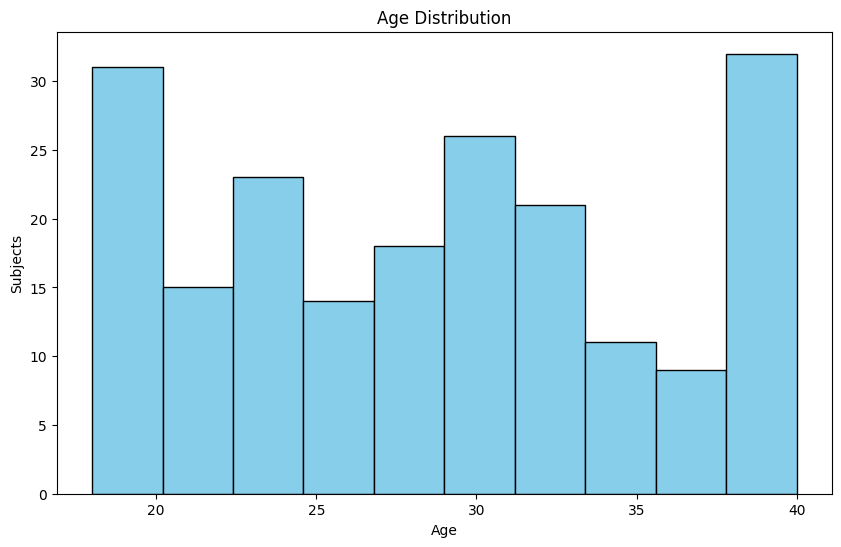

Shapiro-Wilk test statistic: 0.9423
P-value: 0.0000
The age distribution is NOT normal.


In [14]:
# Histrogram
plt.figure(figsize=(10, 6))
plt.hist(new_df['age'], color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Subjects')
plt.title('Age Distribution')
#plt.grid(True)
plt.show()

# Apply Shapiro-Wilk test on the 'age' column
stat, p_value = shapiro(new_df['age'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The age distribution is normal.")
else:
    print("The age distribution is NOT normal.")

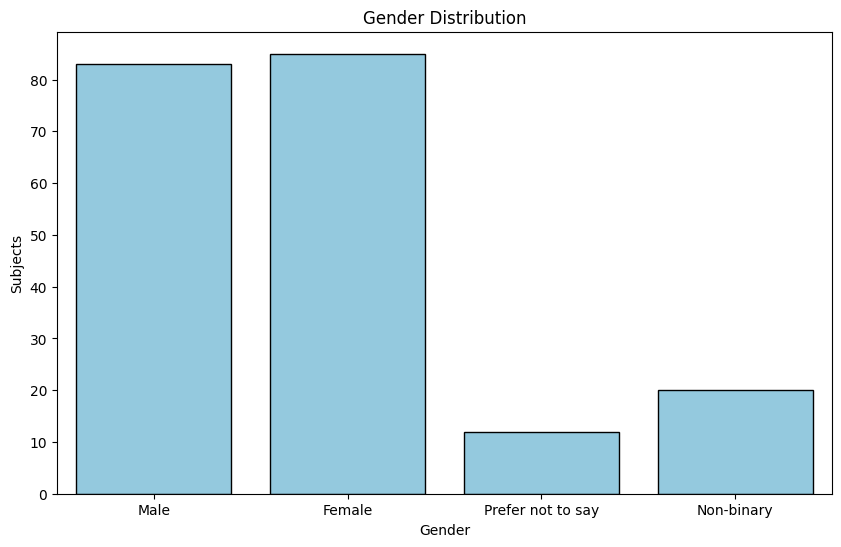

Shapiro-Wilk test statistic: 0.7891
P-value: 0.0000
The gender distribution is NOT normal.


In [15]:
#[0] Male [1] Female [2] Non-binary [3] Prefer not to say

# Replace numeric codes with labels
gender_labels = {
    0: 'Male',
    1: 'Female',
    2: 'Non-binary',
    3: 'Prefer not to say'
}
new_df['gender_label'] = new_df['gender'].map(gender_labels)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='gender_label', color='skyblue',edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Subjects')
plt.title('Gender Distribution')
#plt.xticks(rotation=15)
#plt.grid(True)
plt.show()

# Apply Shapiro-Wilk test on the 'gender' column
stat, p_value = shapiro(new_df['gender'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The gender distribution is normal.")
else:
    print("The gender distribution is NOT normal.")


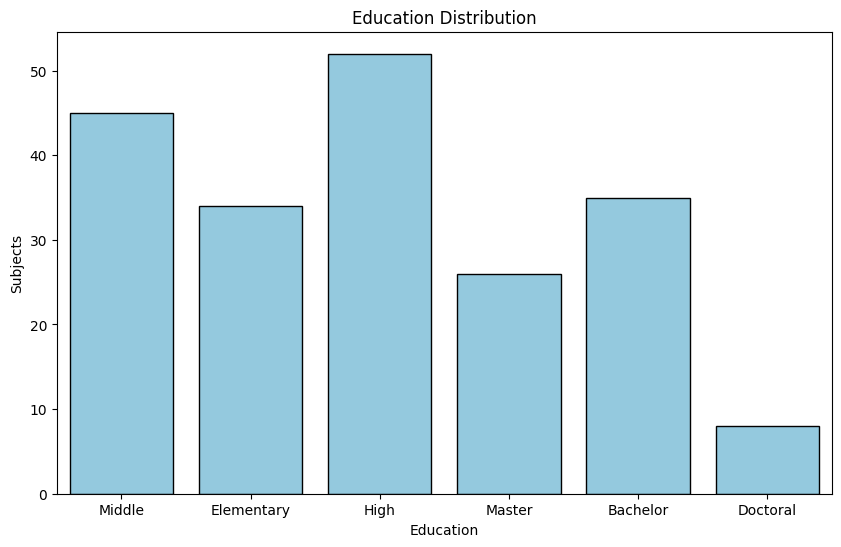

Shapiro-Wilk test statistic: 0.9039
P-value: 0.0000
The education distribution is NOT normal.


In [16]:
#[5] Elementary school [8] Middle school [13] High School [18]Bachelor's Degree [22] Master's Degree [25] Doctoral Degree

# Replace numeric codes with labels
school_labels = {
    5: 'Elementary',
    8: 'Middle',
    13: 'High',
    18: 'Bachelor',
    22: 'Master',
    25: 'Doctoral'
}
new_df['school_labels'] = new_df['education'].map(school_labels)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='school_labels', color='skyblue',edgecolor='black')
plt.xlabel('Education')
plt.ylabel('Subjects')
plt.title('Education Distribution')
#plt.xticks(rotation=15)
#plt.grid(True)
plt.show()

# Apply Shapiro-Wilk test on the 'education' column
stat, p_value = shapiro(new_df['education'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The education distribution is normal.")
else:
    print("The education distribution is NOT normal.")

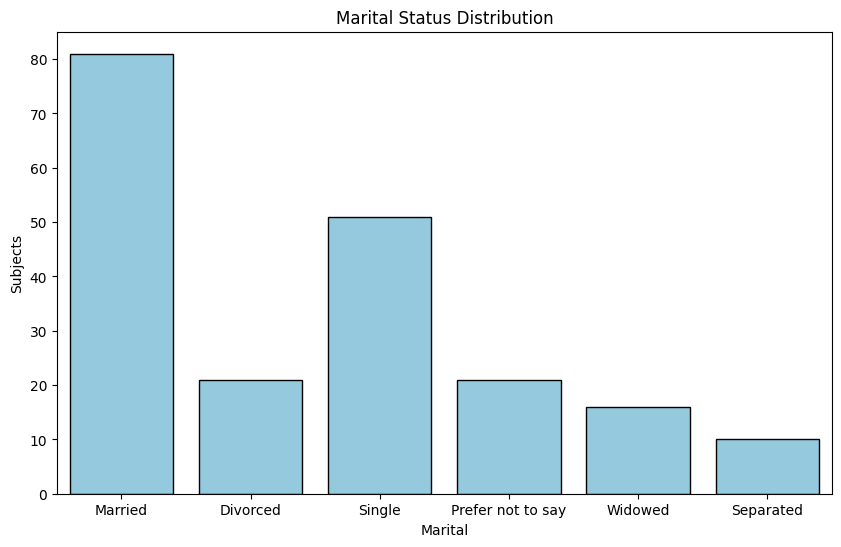

Shapiro-Wilk test statistic: 0.8090
P-value: 0.000000000
The marital status distribution is NOT normal.


In [17]:
#[5] [0] Single [1] Married [2] Divorced [3] Widowed [4] Separated [5] Prefer not to say

# Replace numeric codes with labels
marital_labels = {
    0: 'Single',
    1: 'Married',
    2: 'Divorced',
    3: 'Widowed',
    4: 'Separated',
    5: 'Prefer not to say'
}
new_df['marital_labels'] = new_df['marital'].map(marital_labels)

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=new_df, x='marital_labels', color='skyblue',edgecolor='black')
plt.xlabel('Marital')
plt.ylabel('Subjects')
plt.title('Marital Status Distribution')
#plt.xticks(rotation=15)
plt.show()

# Apply Shapiro-Wilk test on the 'marital' column
stat, p_value = shapiro(new_df['marital'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.9f}")

if p_value > 0.05:
    print("The marital status distribution is normal.")
else:
    print("The marital status distribution is NOT normal.")

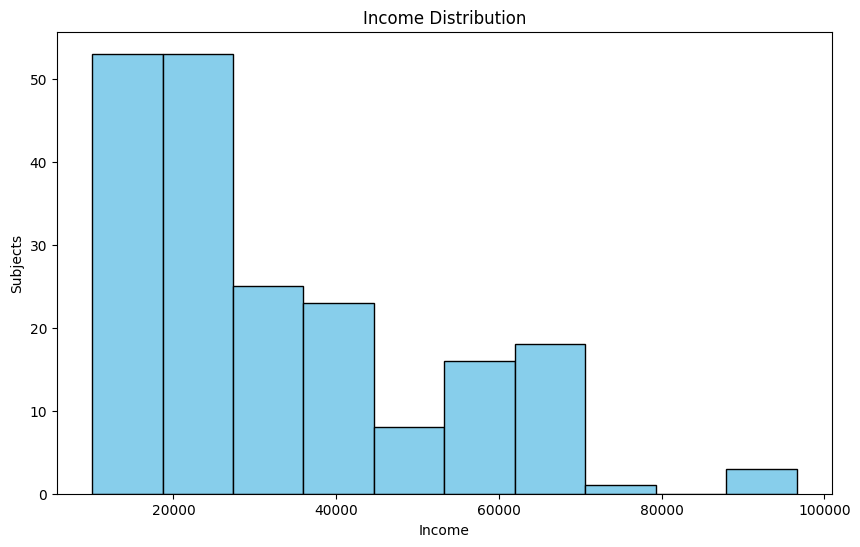

Shapiro-Wilk test statistic: 0.8894
P-value: 0.0000
The income distribution is NOT normal.


In [18]:
# Histrogram
plt.figure(figsize=(10, 6))
plt.hist(new_df['income'], color='skyblue', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Subjects')
plt.title('Income Distribution')
#plt.grid(True)
plt.show()

# Apply Shapiro-Wilk test on the 'income' column
stat, p_value = shapiro(new_df['income'])

print(f"Shapiro-Wilk test statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value > 0.05:
    print("The income distribution is normal.")
else:
    print("The income distribution is NOT normal.")

Since normality assumptions are violated, parametric tests that require normally distributed data (e.g., t-tests, ANOVA, Pearson correlations) may not be appropriate without data transformation. Instead, nonparametric statistical methods should be considered as they do not assume normality and are robust to skewed or ordinal data. Examples include the Mann-Whitney U test, Kruskal-Wallis test, and Spearman rank correlations.

Verifying the absence of normality supports the use of non-parametric correlation tests (e.g., Spearman’s rho) when exploring relationships between sociodemographic characteristics and behavioral traits relevant to the development of player personas for the game.

## Column processing

In order to focus on internet addiction, let's drop out all the indices related to other addictions:
- dropped columns --> AUDIT (Alcohol Use Disorders Identification Test), DAST (Drug Abuse Screening Test)
- maintained cols --> PGSI (Problem Gambling Severity Index), PCL-5 (PTSD Checklist for DSM-5), MSPSS (Multidimensional Scale of Perceived Social Support), SWLS (Satisfaction With Life Scale), WHO-5 (Well-Being Index)

In [19]:
# Identify columns related to AUDIT and DAST
cols_to_remove = [col for col in new_df.columns if col.lower().startswith(('audit','dast'))]

# Drop those columns
df_filtered = new_df.drop(columns=cols_to_remove)

In [20]:
df_filtered

,age,gender,education,marital,income,pgsi_1,pgsi_2,pgsi_3,pgsi_4,pgsi_5,...,swls_4,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5,gender_label,school_labels,marital_labels
0,39.0,0,8.0,1.0,14000,3.0,3,3.0,0,3,...,2.0,0,2.0,3,3.0,3.0,2.0,Male,Middle,Married
1,18.0,1,5.0,1.0,25000,0.0,0,0.0,3,0,...,4.0,4,0.0,0,3.0,2.0,2.0,Female,Elementary,Married
2,40.0,0,13.0,2.0,56000,0.0,0,0.0,0,0,...,0.0,2,3.0,2,3.0,2.0,3.0,Male,High,Divorced
3,24.0,1,22.0,0.0,35000,0.0,0,0.0,0,0,...,3.0,4,3.0,2,1.0,2.0,3.0,Female,Master,Single
4,19.0,1,22.0,1.0,42000,0.0,0,0.0,0,0,...,5.0,7,5.0,5,4.0,3.0,3.0,Female,Master,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,0.0,0,0.0,0,0,...,0.0,0,0.0,3,3.0,3.0,1.0,Male,High,Married
196,21.0,0,18.0,1.0,38000,0.0,0,0.0,0,0,...,4.0,3,3.0,3,2.0,0.0,3.0,Male,Bachelor,Married
197,20.0,1,22.0,4.0,50000,0.0,0,0.0,1,0,...,1.0,7,3.0,5,5.0,5.0,3.0,Female,Master,Separated
198,39.0,0,8.0,1.0,22000,3.0,3,3.0,3,2,...,4.0,1,1.0,0,3.0,2.0,0.0,Male,Middle,Married


In [21]:
results = []
for i in range(1, 21):
    col = f'iat_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results)
result_df.head(10)

,column,statistic,p_value,alpha,normal
0,iat_1,0.901923,3.336925e-10,0.05,False
1,iat_2,0.901642,3.200776e-10,0.05,False
2,iat_3,0.895352,1.284029e-10,0.05,False
3,iat_4,0.883647,2.570883e-11,0.05,False
4,iat_5,0.902375,3.569170e-10,0.05,False
5,iat_6,0.898295,1.959786e-10,0.05,False
6,iat_7,0.887740,4.454975e-11,0.05,False
7,iat_8,0.890957,6.927039e-11,0.05,False
8,iat_9,0.881595,1.960928e-11,0.05,False
9,iat_10,0.865863,2.711615e-12,0.05,False


Since the Shapiro–Wilk tests indicated that the IAT item distributions are not normally distributed (p < 0.05 for all items), a non-parametric correlation measure was considered more appropriate. For this reason, the Spearman correlation test was applied to assess the degree of association among the IAT items.

**Spearman correlation test**

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Spearman correlation at least as extreme as the one computed from these datasets. Although calculation of the p-value does not make strong assumptions about the distributions underlying the samples, it is only accurate for very large samples (>500 observations).
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

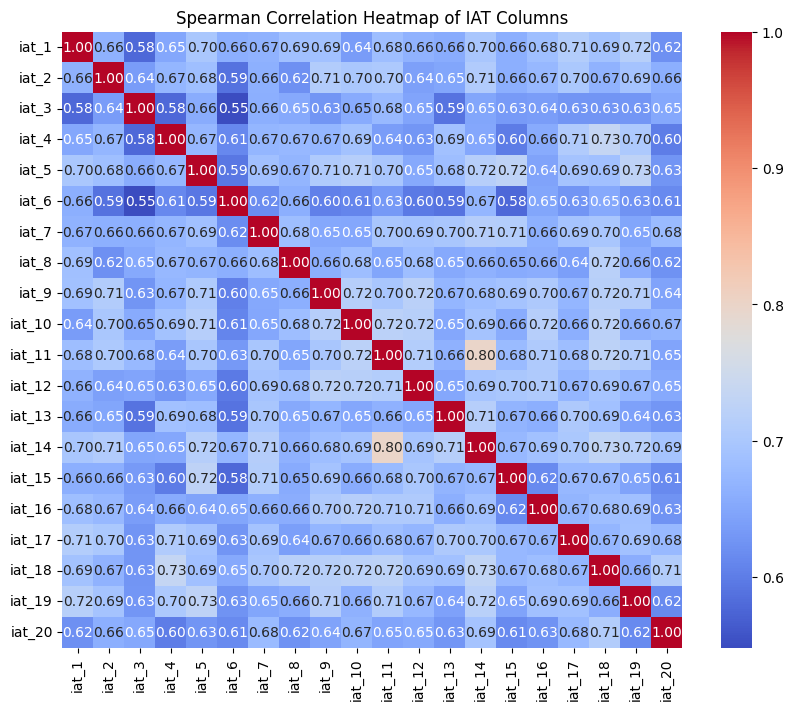

In [22]:
# Select only IAT columns
iat_cols = [col for col in df_filtered.columns if col.startswith('iat_')]
df_iat = df_filtered[iat_cols]

# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix_iat = df_iat.corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_iat, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of IAT Columns")
plt.show()

In [23]:
# Extract upper triangle (excluding diagonal)
corr_values_iat = corr_matrix_iat.where(~np.eye(corr_matrix_iat.shape[0], dtype=bool)).stack()

# Compute min and max
min_corr_iat = corr_values_iat.min()
max_corr_iat = corr_values_iat.max()

print(f"Minimum Spearman correlation (excluding diagonal): {min_corr_iat:.2f}")
print(f"Maximum Spearman correlation (excluding diagonal): {max_corr_iat:.2f}")

Minimum Spearman correlation (excluding diagonal): 0.55
Maximum Spearman correlation (excluding diagonal): 0.80


The strong positive correlations found between the items confirm their internal consistency, meaning that the individual variables tend to measure the same underlying construct. Given this internal coherence, it is therefore reasonable to compute a composite score by summing all IAT item values for each participant. This sum reflects the overall IAT index and serves as a representative measure of the latent trait captured by the individual items.

## Cronbach’s Alpha (forse da eliminare come commento)
The use of Cronbach’s Alpha in this context is justified by the nature of the IAT variables. Each IAT item (iat_1 to iat_20) represents an ordinal or interval-type variable derived from Likert-like responses, all intended to measure the same underlying psychological construct. After verifying that the distributions of the IAT items are not normal through the Shapiro–Wilk test, and that they are strongly intercorrelated based on the Spearman correlation matrix, it is appropriate to assess their internal consistency.
Cronbach’s Alpha provides a reliability coefficient that quantifies how closely related a set of items are as a group. In other words, it measures the degree to which all the IAT items collectively capture the same latent dimension. A high alpha value (typically above 0.9) indicates excellent internal consistency, confirming that the items can be combined into a single composite score.
For this reason, computing Cronbach’s Alpha allows us to statistically validate the decision to aggregate all IAT items into a single index by summing their values for each participant. This composite IAT score can then be interpreted as a reliable representation of the overall construct measured by the individual items.

https://how.dev/answers/how-to-implement-cronbachs-alpha-for-reliability-in-python

**Cronbach’s Alpha**

Alpha was developed by Lee Cronbach in 195111 to provide a measure of the internal consistency of a test or scale; it is expressed as a number between 0 and 1. Internal consistency describes the extent to which all the items in a test measure the same concept or construct and hence it is connected to the inter-relatedness of the items within the test. 

A high value of alpha (> 0.90) may suggest redundancies and show that the test length should be shortened.
https://pmc.ncbi.nlm.nih.gov/articles/PMC4205511/

The use of Cronbach’s Alpha in this context is justified by the nature of the IAT variables. Each IAT item (iat_1 to iat_20) represents an ordinal or interval-type variable derived from Likert-like responses, all intended to measure the same underlying psychological construct. After verifying that the distributions of the IAT items are not normal through the Shapiro–Wilk test, and that they are strongly intercorrelated based on the Spearman correlation matrix, it is appropriate to assess their internal consistency.
Cronbach’s Alpha provides a reliability coefficient that quantifies how closely related a set of items are as a group. In other words, it measures the degree to which all the IAT items collectively capture the same latent dimension. A high alpha value (typically above 0.9) indicates excellent internal consistency, confirming that the items can be combined into a single composite score.
For this reason, computing Cronbach’s Alpha allows us to statistically validate the decision to aggregate all IAT items into a single index by summing their values for each participant. This composite IAT score can then be interpreted as a reliable representation of the overall construct measured by the individual items.

https://how.dev/answers/how-to-implement-cronbachs-alpha-for-reliability-in-python

In [24]:
def cronbach_alpha(data):
    # Transform the data frame into a correlation matrix
    df_corr = data.corr()
    
    # Calculate N
    # The number of variables is equal to the number of columns in the dataframe
    N = data.shape[1]
    
    # Calculate r
    # For this, we'll loop through all the columns and append every relevant correlation to an array called 'r_s'. 
    # Then, we'll calculate the mean of 'r_s'.
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
    mean_r = np.mean(rs)
    
   # Use the formula to calculate Cronbach's Alpha 
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha


## IAT

In [25]:
cronbach_alpha(df_iat)

0.9728868862081862

In [26]:
#specify the columns to sum
cols_to_sum = [col for col in df_filtered.columns if col.lower().startswith(('iat'))]

#define new column that contains sum of specific columns
df_filtered['sum_iat'] = df_filtered[cols_to_sum].sum(axis=1)

#view updated DataFrame
df_filtered

,age,gender,education,marital,income,pgsi_1,pgsi_2,pgsi_3,pgsi_4,pgsi_5,...,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5,gender_label,school_labels,marital_labels,sum_iat
0,39.0,0,8.0,1.0,14000,3.0,3,3.0,0,3,...,0,2.0,3,3.0,3.0,2.0,Male,Middle,Married,39.000000
1,18.0,1,5.0,1.0,25000,0.0,0,0.0,3,0,...,4,0.0,0,3.0,2.0,2.0,Female,Elementary,Married,33.000000
2,40.0,0,13.0,2.0,56000,0.0,0,0.0,0,0,...,2,3.0,2,3.0,2.0,3.0,Male,High,Divorced,60.000000
3,24.0,1,22.0,0.0,35000,0.0,0,0.0,0,0,...,4,3.0,2,1.0,2.0,3.0,Female,Master,Single,56.000000
4,19.0,1,22.0,1.0,42000,0.0,0,0.0,0,0,...,7,5.0,5,4.0,3.0,3.0,Female,Master,Married,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,0.0,0,0.0,0,0,...,0,0.0,3,3.0,3.0,1.0,Male,High,Married,66.000000
196,21.0,0,18.0,1.0,38000,0.0,0,0.0,0,0,...,3,3.0,3,2.0,0.0,3.0,Male,Bachelor,Married,68.000000
197,20.0,1,22.0,4.0,50000,0.0,0,0.0,1,0,...,7,3.0,5,5.0,5.0,3.0,Female,Master,Separated,11.000000
198,39.0,0,8.0,1.0,22000,3.0,3,3.0,3,2,...,1,1.0,0,3.0,2.0,0.0,Male,Middle,Married,46.000000


In [27]:
cols_to_keep = [col for col in df_filtered.columns if not col.lower().startswith('iat') or col == 'sum_iat']
df_filtered = df_filtered[cols_to_keep]
df_filtered

,age,gender,education,marital,income,pgsi_1,pgsi_2,pgsi_3,pgsi_4,pgsi_5,...,swls_5,who5_1,who5_2,who5_3,who5_4,who5_5,gender_label,school_labels,marital_labels,sum_iat
0,39.0,0,8.0,1.0,14000,3.0,3,3.0,0,3,...,0,2.0,3,3.0,3.0,2.0,Male,Middle,Married,39.000000
1,18.0,1,5.0,1.0,25000,0.0,0,0.0,3,0,...,4,0.0,0,3.0,2.0,2.0,Female,Elementary,Married,33.000000
2,40.0,0,13.0,2.0,56000,0.0,0,0.0,0,0,...,2,3.0,2,3.0,2.0,3.0,Male,High,Divorced,60.000000
3,24.0,1,22.0,0.0,35000,0.0,0,0.0,0,0,...,4,3.0,2,1.0,2.0,3.0,Female,Master,Single,56.000000
4,19.0,1,22.0,1.0,42000,0.0,0,0.0,0,0,...,7,5.0,5,4.0,3.0,3.0,Female,Master,Married,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,0.0,0,0.0,0,0,...,0,0.0,3,3.0,3.0,1.0,Male,High,Married,66.000000
196,21.0,0,18.0,1.0,38000,0.0,0,0.0,0,0,...,3,3.0,3,2.0,0.0,3.0,Male,Bachelor,Married,68.000000
197,20.0,1,22.0,4.0,50000,0.0,0,0.0,1,0,...,7,3.0,5,5.0,5.0,3.0,Female,Master,Separated,11.000000
198,39.0,0,8.0,1.0,22000,3.0,3,3.0,3,2,...,1,1.0,0,3.0,2.0,0.0,Male,Middle,Married,46.000000


Following the computation of the composite IAT score by summing the 20 item scores into 'sum_iat' and removal of the individual item columns, participants are categorized into internet addiction levels based on established author guidelines from Young (1998).
Specifically, scores below **40 indicate average (normal) users**, scores of **40 to 69 indicate problematic internet use**, and scores of **70 or above indicate severe internet addiction**. This categorization provides a clinically meaningful stratification of participants’ internet use severity, facilitating interpretation, group comparisons, and targeted interventions based on risk levels.

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_57463/115624921.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['addiction_level'] = df_filtered['sum_iat'].apply(classify_iat)
/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_57463/115624921.py:25: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(


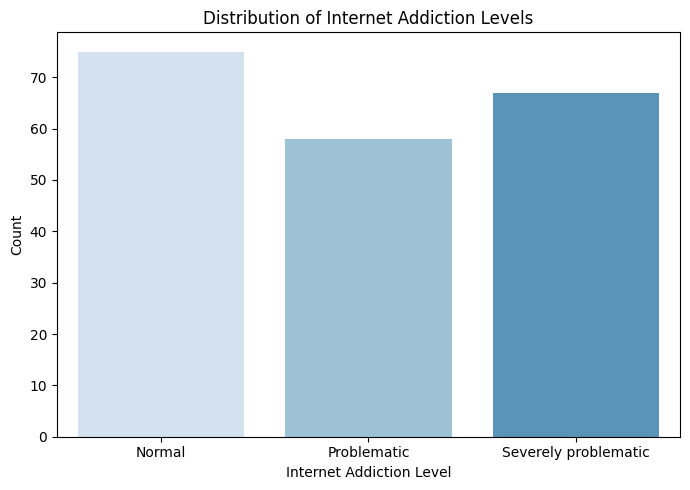

(None,
 addiction_level
 Normal                  75
 Severely problematic    67
 Problematic             58
 Name: count, dtype: int64)

In [28]:
# Define addiction levels based on sum_iat cut-offs
def classify_iat(total):
    if total <= 39:
        return 'Normal'
    elif total <= 69:
        return 'Problematic'
    else:
        return 'Severely problematic'

# Apply classification
df_filtered['addiction_level'] = df_filtered['sum_iat'].apply(classify_iat)

# Group and count occurrences
# Prepare data as DataFrame with explicit columns
order = ['Normal', 'Problematic', 'Severely problematic']
grouped = df_filtered['addiction_level'].value_counts().reindex(order).reset_index() 
# reindex Ensures the Series is re-ordered to match your custom order list (['Normal', 'Problematic', 'Severely problematic']). 

grouped.columns = ['addiction_level', 'count']

# Create the blue gradient palette and create the barplot
blue_palette = sns.color_palette("Blues", n_colors=4)

plt.figure(figsize=(7,5))
sns.barplot(
    data=grouped,
    x='addiction_level',
    y='count',
    hue='addiction_level',
    palette=blue_palette,
    dodge=False,       # Avoids stacked bars
    order=order,
    legend=False
)
plt.xlabel('Internet Addiction Level')
plt.ylabel('Count')
plt.title('Distribution of Internet Addiction Levels')
plt.tight_layout()

plt.show(), df_filtered['addiction_level'].value_counts()

According to IAT Author guidelines there are 75 average users, 58 problematic internet users and 67 severely problematic users in the df_filtered.

## Other psychometric instruments

In [29]:
pgsi_cols = [col for col in df_filtered.columns if col.startswith('pgsi_')]
df_pgsi = df_filtered[pgsi_cols]

pcl5_cols = [col for col in df_filtered.columns if col.startswith('pcl5_')]
df_pcl5 = df_filtered[pcl5_cols]

mspss_cols = [col for col in df_filtered.columns if col.startswith('mspss_')]
df_mspss = df_filtered[mspss_cols]

swls_cols = [col for col in df_filtered.columns if col.startswith('swls_')]
df_swls = df_filtered[swls_cols]

who5_cols = [col for col in df_filtered.columns if col.startswith('who5_')]
df_who5 = df_filtered[who5_cols]

In addition to the IAT, the internal consistency of the other psychometric instruments included in the dataset — namely the WHO-5, MSPSS, SWLS, PCL-5, and PGSI — was assessed using Cronbach’s Alpha. 
Each of these scales is composed of multiple items rated on a numerical or Likert-type scale (Likert-type scales are ordinal rating scales commonly used in questionnaires that ask respondents to indicate their level of agreement or frequency on a symmetric scale, allowing quantification of subjective attitudes.), and therefore lends itself to this type of reliability analysis. The Cronbach’s Alpha coefficient provides an estimate of the degree of internal correlation among the items within each instrument, indicating how well they jointly measure the same underlying construct.

In [30]:
cronbach_alpha(df_pgsi), cronbach_alpha(df_pcl5), cronbach_alpha(df_mspss), cronbach_alpha(df_swls), cronbach_alpha(df_who5)

(0.8935404063641771,
 0.9817491160882883,
 0.8823825206647208,
 0.7810753349863303,
 0.6176878189716989)

The results indicated excellent consistency for the PCL-5 (α = 0.98), good consistency for PGSI (α = 0.89) and MSPSS (α = 0.88) scales, acceptable consistency for the SWLS (α = 0.78) and questionable consistency for the WHO-5 (α = 0.62).
These findings confirm that, overall, the items within each scale consistently measure their intended construct. However, the relatively lower coefficient for the WHO-5 suggests a broader conceptual coverage of well-being, possibly reflecting different facets of positive affect and life satisfaction.

Based on the Cronbach’s Alpha results, the next analytical step was defined according to the internal reliability of each psychometric instrument. 
Scales showing excellent internal consistency (α ≥ 0.9), such as the **PCL-5 (α = 0.98), were considered highly homogeneous and unidimensional**. In such cases, further item-level correlation analyses were deemed unnecessary, as the items are already strongly interrelated and reflect a single underlying construct.
For scales with good to very **good reliability (0.7 ≤ α < 0.9) — including the PGSI (α = 0.89), MSPSS (α = 0.88), and SWLS (α = 0.78) — item-level Spearman correlations were examined to confirm internal coherence and to explore the relative contribution of individual items to the overall construct.**
Finally, for the WHO-5 (α = 0.62), whose internal consistency was acceptable but comparatively lower, item-level correlations were computed to better understand the heterogeneity among items and the potential multidimensionality of the well-being construct.

After these reliability-driven evaluations, Spearman correlations between the total scores of all psychometric instruments were computed to assess inter-construct relationships. This two-step approach — reliability check followed by inter-scale correlation — ensures that each scale is internally coherent while verifying that the constructs measured are distinct and non-redundant.

### PGSI

In [31]:
results_pgsi = []
for i in range(1, 10):
    col = f'pgsi_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results_pgsi.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_pgsi)
result_df

,column,statistic,p_value,alpha,normal
0,pgsi_1,0.666353,1.229168e-19,0.05,False
1,pgsi_2,0.679333,2.809391e-19,0.05,False
2,pgsi_3,0.660211,8.382582e-20,0.05,False
3,pgsi_4,0.670123,1.558793e-19,0.05,False
4,pgsi_5,0.640373,2.520194e-20,0.05,False
5,pgsi_6,0.676561,2.349786e-19,0.05,False
6,pgsi_7,0.656883,6.827087e-20,0.05,False
7,pgsi_8,0.649518,4.357854e-20,0.05,False
8,pgsi_9,0.647068,3.759280e-20,0.05,False


Minimum Spearman correlation (excluding diagonal): 0.25
Maximum Spearman correlation (excluding diagonal): 0.51


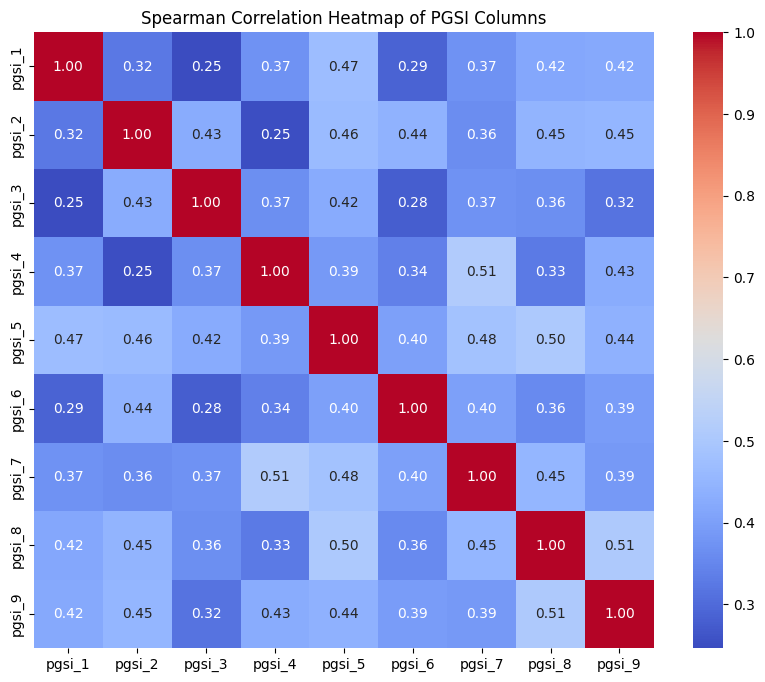

In [32]:
# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix_pgsi = df_pgsi.corr(method='spearman')

# Extract upper triangle (excluding diagonal)
corr_values_pgsi = corr_matrix_pgsi.where(~np.eye(corr_matrix_pgsi.shape[0], dtype=bool)).stack()

# Compute min and max
min_corr_pgsi = corr_values_pgsi.min()
max_corr_pgsi = corr_values_pgsi.max()

print(f"Minimum Spearman correlation (excluding diagonal): {min_corr_pgsi:.2f}")
print(f"Maximum Spearman correlation (excluding diagonal): {max_corr_pgsi:.2f}")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_pgsi, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of PGSI Columns")
plt.show()

For the PGSI, the internal consistency was excellent (Cronbach’s α = 0.89), confirming that the items coherently measure the underlying construct of problem gambling.
The inter-item Spearman correlations ranged between ρ = 0.25 and ρ = 0.51, indicating moderate positive associations among items. This range supports the Alpha result, showing that while the items are sufficiently related to form a reliable scale, they are not redundant.
Such a pattern reflects a balanced internal structure, where each item contributes unique yet coherent information to the overall score.

### MSPSS

The MSPSS demonstrated good overall internal consistency (Cronbach’s α = 0.884), indicating that the items reliably measure perceived social support. To explore the multidimensional structure of the scale, we examined the internal correlations within each subscale: Significant Other, Family, and Friends.

In [33]:
results_mspss = []
for i in range(1, 13):
    col = f'mspss_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results_mspss.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_mspss)
result_df

,column,statistic,p_value,alpha,normal
0,mspss_1,0.842697,1.927019e-13,0.05,False
1,mspss_2,0.852754,5.862194e-13,0.05,False
2,mspss_3,0.834314,7.910998e-14,0.05,False
3,mspss_4,0.834879,8.392332e-14,0.05,False
4,mspss_5,0.866260,2.844809e-12,0.05,False
5,mspss_6,0.847771,3.356605e-13,0.05,False
6,mspss_7,0.835029,8.525084e-14,0.05,False
7,mspss_8,0.856342,8.829355e-13,0.05,False
8,mspss_9,0.839793,1.410390e-13,0.05,False
9,mspss_10,0.834628,8.175248e-14,0.05,False


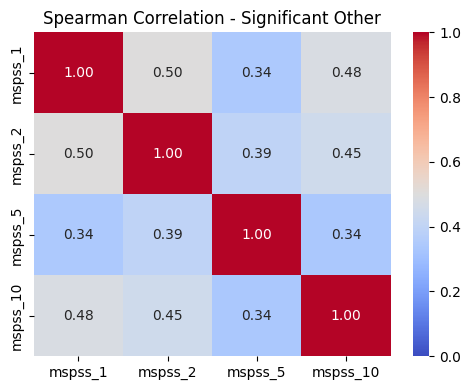

Significant Other - Minimum Spearman correlation (excluding diagonal): 0.34
Significant Other - Maximum Spearman correlation (excluding diagonal): 0.50


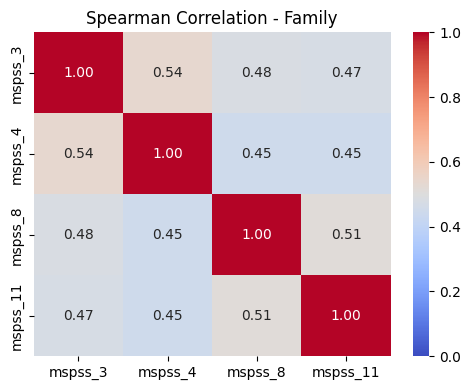

Family - Minimum Spearman correlation (excluding diagonal): 0.45
Family - Maximum Spearman correlation (excluding diagonal): 0.54


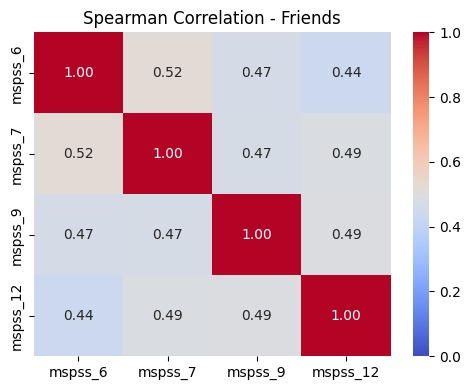

Friends - Minimum Spearman correlation (excluding diagonal): 0.44
Friends - Maximum Spearman correlation (excluding diagonal): 0.52


In [34]:
# Define the subgroups
so_items = [f"mspss_{i}" for i in [1, 2, 5, 10] if f"mspss_{i}" in df_filtered.columns]  # Significant Other
fa_items = [f"mspss_{i}" for i in [3, 4, 8, 11] if f"mspss_{i}" in df_filtered.columns]  # Family
fr_items = [f"mspss_{i}" for i in [6, 7, 9, 12] if f"mspss_{i}" in df_filtered.columns]  # Friends

# Function to plot heatmap
def plot_heatmap(name, cols):
    if not cols:
        print(f"⚠️ No columns found for {name}.")
        return
    corr = df[cols].corr(method='spearman')
    plt.figure(figsize=(5, 4))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=0, vmax=1)
    plt.title(f"Spearman Correlation - {name}")
    plt.tight_layout()
    plt.show()
    
    # Extract upper triangle (excluding diagonal)
    corr_values = corr.where(~np.eye(corr.shape[0], dtype=bool)).stack()
    
    # Compute min and max
    min_corr = corr_values.min()
    max_corr = corr_values.max()
    
    print(f"{name} - Minimum Spearman correlation (excluding diagonal): {min_corr:.2f}")
    print(f"{name} - Maximum Spearman correlation (excluding diagonal): {max_corr:.2f}")

# Plot heatmaps for each subgroup 
plot_heatmap("Significant Other", so_items)
plot_heatmap("Family", fa_items)
plot_heatmap("Friends", fr_items)

Spearman correlation analyses revealed that within-subscale item correlations were moderate. For the Significant Other subscale, correlations ranged from ρ = 0.34 to 0.50; for Family, from ρ = 0.45 to 0.54; and for Friends, from ρ = 0.44 to 0.52. 
These values suggest that while items within each subscale are related, they are not redundant, reflecting a coherent but diverse measurement of each social support domain.
Overall, the pattern of correlations supports the multidimensional structure of the MSPSS: the subscales capture related but distinct facets of perceived social support, with sufficient internal coherence to justify their use as separate subscale scores.

### SWLS

In [35]:
results_swls = []
for i in range(1, 6):
    col = f'swls_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results_swls.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_swls)
result_df

,column,statistic,p_value,alpha,normal
0,swls_1,0.905141,5.408625e-10,0.05,False
1,swls_2,0.913038,1.852238e-09,0.05,False
2,swls_3,0.915247,2.646691e-09,0.05,False
3,swls_4,0.910480,1.233961e-09,0.05,False
4,swls_5,0.913822,2.100912e-09,0.05,False


Minimum Spearman correlation (excluding diagonal): 0.32
Maximum Spearman correlation (excluding diagonal): 0.50


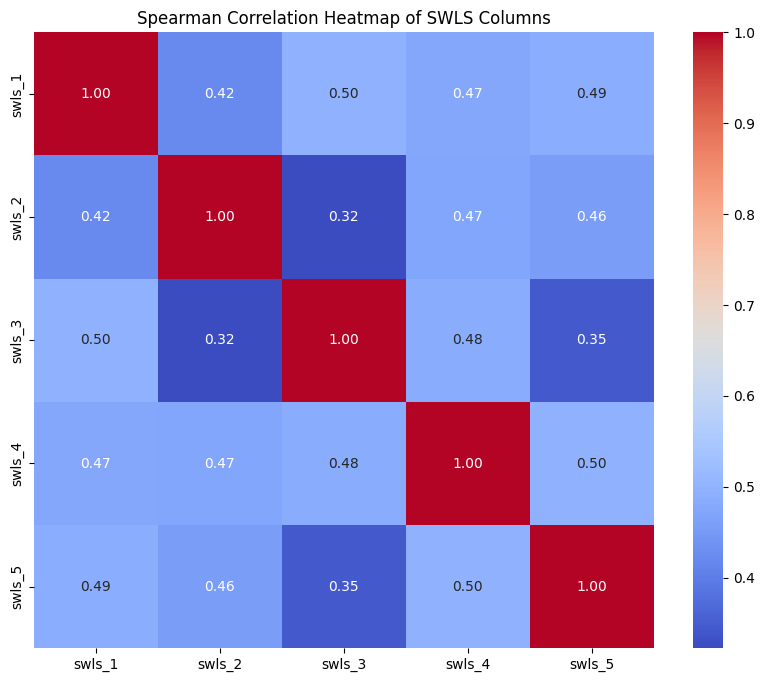

In [36]:
# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix_swls = df_swls.corr(method='spearman')

# Extract upper triangle (excluding diagonal)
corr_values_swls = corr_matrix_swls.where(~np.eye(corr_matrix_swls.shape[0], dtype=bool)).stack()

# Compute min and max
min_corr_swls = corr_values_swls.min()
max_corr_swls = corr_values_swls.max()

print(f"Minimum Spearman correlation (excluding diagonal): {min_corr_swls:.2f}")
print(f"Maximum Spearman correlation (excluding diagonal): {max_corr_swls:.2f}")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_swls, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of SWLS Columns")
plt.show()

Within-scale item correlations were moderate, with Spearman values ranging from ρ = 0.32 to 0.50. This pattern suggests that while the items are positively related, they are not redundant, providing complementary information about the construct of life satisfaction.

### WHO_5

In [37]:
results_who5 = []
for i in range(1, 6):
    col = f'who5_{i}'
    data = df_filtered[col]
    stat, p = shapiro(data)
    results_who5.append({'column': col, 'statistic': stat, 'p_value': p, 'alpha': 0.05, 'normal': p > 0.05})

result_df = pd.DataFrame(results_who5)
result_df

,column,statistic,p_value,alpha,normal
0,who5_1,0.910502,1.238197e-09,0.05,False
1,who5_2,0.891271,7.235471e-11,0.05,False
2,who5_3,0.884698,2.956836e-11,0.05,False
3,who5_4,0.893980,1.057137e-10,0.05,False
4,who5_5,0.893064,9.292637e-11,0.05,False


Minimum Spearman correlation (excluding diagonal): 0.16
Maximum Spearman correlation (excluding diagonal): 0.35


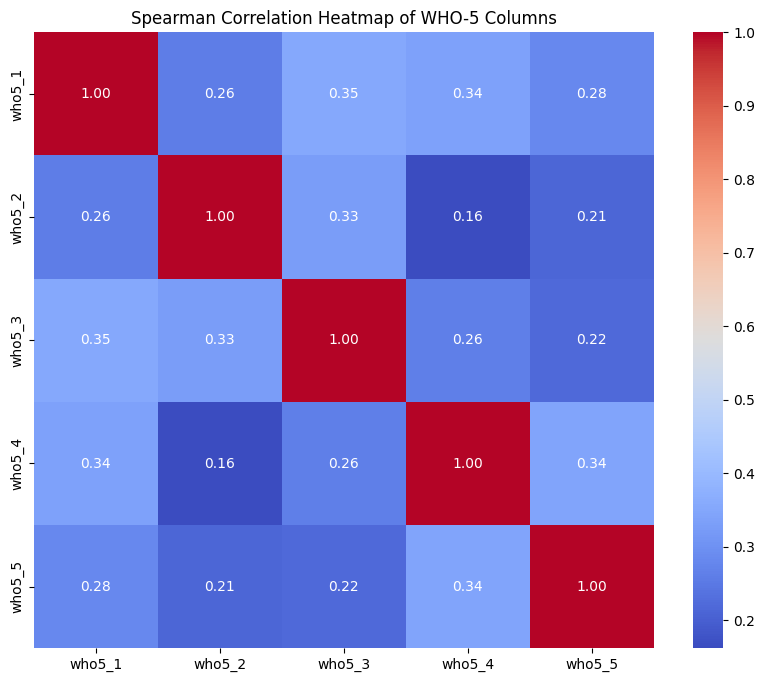

In [38]:
# Calculate the correlation matrix (default is Pearson, for non-parametric use df_iat.corr(method='spearman'))
corr_matrix_who5 = df_who5.corr(method='spearman')

# Extract upper triangle (excluding diagonal)
corr_values_who5 = corr_matrix_who5.where(~np.eye(corr_matrix_who5.shape[0], dtype=bool)).stack()

# Compute min and max
min_corr_who5 = corr_values_who5.min()
max_corr_who5 = corr_values_who5.max()

print(f"Minimum Spearman correlation (excluding diagonal): {min_corr_who5:.2f}")
print(f"Maximum Spearman correlation (excluding diagonal): {max_corr_who5:.2f}")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_who5, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Spearman Correlation Heatmap of WHO-5 Columns")
plt.show()

Within-scale Spearman correlations ranged from ρ = 0.16 to 0.35, suggesting that the items are only weakly to moderately related. This pattern reflects a broader conceptual coverage of well-being, capturing different facets of positive affect and life satisfaction, and highlights the potential multidimensionality of the construct measured by the WHO-5.

## Correlation between IAT and other pshycometric instruments

**Spearman correlation** was applied to examine associations between continuous or ordinal variables that are not normally distributed, such as IAT total scores and numerical demographic variables (e.g., age, income). This nonparametric correlation measures the strength and direction of monotonic relationships without assuming normality.

In contrast, the **Kruskal-Wallis test** was used to compare IAT scores across categorical groups (e.g., gender categories). It is a nonparametric alternative to one-way ANOVA for assessing whether the medians differ between three or more independent groups when data are not normally distributed.

The Kruskal-Wallis test is essentially **an extension of the Mann-Whitney U test**, which is used for comparing exactly two independent groups on a continuous or ordinal variable under non-normality assumptions. Therefore, the Mann-Whitney U test is applied when comparing two groups, while Kruskal-Wallis is appropriate for three or more groups.

Thus, the choice of test depends on whether the aim is to assess association between variables (Spearman), or differences between two groups (Mann-Whitney U), or differences among three or more groups (Kruskal-Wallis) under non-normal data conditions.

https://www.slideshare.net/slideshow/kruskal-wallis-test-friedman-test-spearman-correlation/197229012

### AGE

The IAT total score was analyzed across different age groups to explore potential demographic effects.
Since both variables were non-normally distributed, as previously demonstrated, a non-parametric Kruskal–Wallis test was used.
Visual inspection through boxplots and the statistical test allow to assess whether the level of Internet addiction significantly differs among age categories.

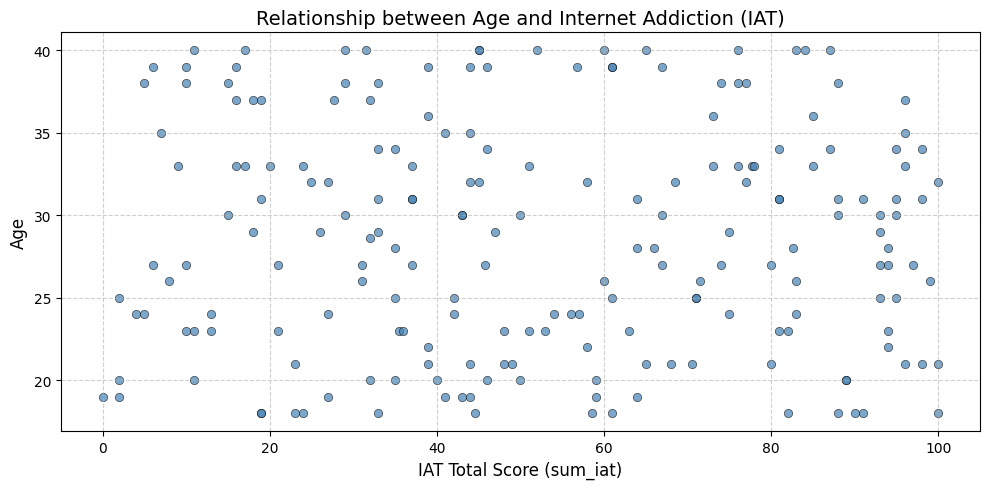

Spearman's correlation coefficient: -0.020
p-value: 0.783


In [39]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=df_filtered['sum_iat'],
    y=df_filtered['age'],
    color='steelblue',
    edgecolor='black',
    alpha=0.7
)
plt.title('Relationship between Age and Internet Addiction (IAT)', fontsize=14)
plt.xlabel('IAT Total Score (sum_iat)', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Spearman correlation test
spearman_corr, spearman_p_value = spearmanr(df_filtered['sum_iat'], df_filtered['age'])

print(f"Spearman's correlation coefficient: {spearman_corr:.3f}")
print(f"p-value: {spearman_p_value:.3f}")

No significant correlation was found between participants’ age and their Internet Addiction Test (IAT) scores (ρ = -0.02, p = 0.783).
This indicates that, within this sample, the level of Internet addiction does not appear to vary with age.

### GENDER

=== Descriptive stats sum_iat by Gender ===
                    n  median   mean    std
gender_label                               
Male               83    44.0  48.77  28.93
Female             85    61.0  58.83  28.68
Non-binary         20    42.5  39.45  22.38
Prefer not to say  12    66.0  56.50  30.05

--- Kruskal–Wallis test (k=4 groups) ---
H = 9.724, df = 3, p = 0.0211
Effect size: epsilon-squared ε² = 0.034

=== Post-hoc pairwise Mann–Whitney (Holm–Bonferroni corrected p-values) ===
   Group_A           Group_B  n_A  n_B      U  p_raw  r_rank_biserial  HL_diff(B-A)  p_holm
    Female        Non-binary   85   20 1195.0 0.0049          -0.4059         -21.0  0.0296
      Male            Female   83   85 2808.5 0.0226           0.2038          11.0  0.1131
Non-binary Prefer not to say   20   12   83.0 0.1553           0.3083          23.0  0.6211
      Male        Non-binary   83   20  948.0 0.3272          -0.1422          -8.0  0.9816
      Male Prefer not to say   83   12  426

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_57463/1719850150.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


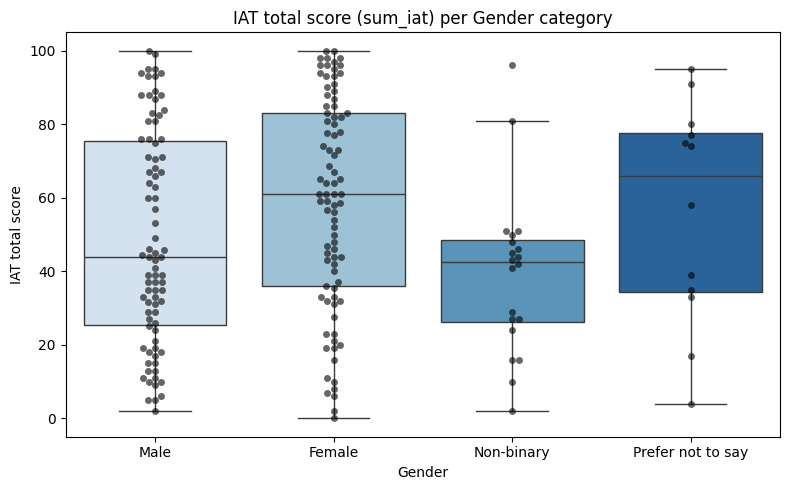

In [40]:
# Nonparametric analysis of sum_iat by gender (4 categories)
# Use Kruskal–Wallis for ≥3 groups (here 4) + post-hoc Mann–Whitney with Holm correction
# If only 2 groups, use Mann–Whitney U directly
# Effect sizes: ε² (omnibus), rank-biserial r (pairwise), HL (robust difference)

# Preparing data
gender_labels = {0: "Male", 1: "Female", 2: "Non-binary", 3: "Prefer not to say"}

df_gender = df_filtered[["gender", "sum_iat"]].copy()
df_gender["gender_label"] = df_gender["gender"].map(gender_labels)

order_all = ["Male", "Female", "Non-binary", "Prefer not to say"]
present_groups = [g for g in order_all if g in df_gender["gender_label"].unique().tolist()]
if len(present_groups) < 2:
    raise RuntimeError("At least 2 gender categories with data are needed.")


desc = (
    df_gender.groupby("gender_label")["sum_iat"]
    .agg(n="count", median="median", mean="mean", std="std")
    .reindex(order_all)
)
print("=== Descriptive stats sum_iat by Gender ===")
print(desc.round(2).fillna(""))

# Test: 2 groups → Mann–Whitney U, ≥3 groups → Kruskal–Wallis + post hoc
if len(present_groups) == 2:
    g1, g2 = present_groups
    a = df_gender.loc[df_gender["gender_label"] == g1, "sum_iat"].values
    b = df_gender.loc[df_gender["gender_label"] == g2, "sum_iat"].values

    U, p = mannwhitneyu(a, b, alternative="two-sided", method="auto")
    r_rb = 1 - (2 * U) / (len(a) * len(b))  # rank-biserial correlation

    print(f"\n--- Mann–Whitney U test ({g1} vs {g2}) ---")
    print(f"U = {U:.2f}, p = {p:.4f}, rank-biserial r = {r_rb:.3f}")

else:
    groups = [df_gender.loc[df_gender["gender_label"] == g, "sum_iat"].values for g in present_groups]
    H, p_kw = kruskal(*groups)
    n_tot = sum(len(g) for g in groups)
    k = len(groups)
    eps2 = (H - k + 1) / (n_tot - k) if (n_tot - k) > 0 else np.nan  # epsilon-squared effect size

    print(f"\n--- Kruskal–Wallis test (k={k} groups) ---")
    print(f"H = {H:.3f}, df = {k - 1}, p = {p_kw:.4f}")
    print(f"Effect size: epsilon-squared ε² = {eps2:.3f}")

    # Post-hoc pairwise Mann–Whitney with Holm correction
    def rank_biserial_from_U(U, n1, n2):
        return 1 - (2 * U) / (n1 * n2)

    def hodges_lehmann(a, b):
        return float(np.median(np.subtract.outer(b, a).ravel()))

    def holm_bonferroni(pvals):
        m = len(pvals)
        order = np.argsort(pvals)
        p_sorted = np.array(pvals)[order]
        adj = np.empty(m, dtype=float)
        running_max = 0.0
        for i, p in enumerate(p_sorted):
            val = (m - i) * p
            running_max = max(running_max, val)
            adj[i] = min(1.0, running_max)
        p_adj = np.empty(m, dtype=float)
        p_adj[order] = adj
        return p_adj

    pairs = []
    for gA, gB in itertools.combinations(present_groups, 2):
        A = df_gender.loc[df_gender["gender_label"] == gA, "sum_iat"].values
        B = df_gender.loc[df_gender["gender_label"] == gB, "sum_iat"].values
        U, p_raw = mannwhitneyu(A, B, alternative="two-sided", method="auto")
        r_rb = rank_biserial_from_U(U, len(A), len(B))
        hl = hodges_lehmann(A, B)
        pairs.append({
            "Group_A": gA, "Group_B": gB,
            "n_A": len(A), "n_B": len(B),
            "U": float(U), "p_raw": float(p_raw),
            "r_rank_biserial": float(r_rb),
            "HL_diff(B-A)": float(hl)
        })

    pairs_df = pd.DataFrame(pairs)
    pairs_df["p_holm"] = holm_bonferroni(pairs_df["p_raw"].values)
    pairs_df = pairs_df.sort_values("p_holm").reset_index(drop=True)

    print("\n=== Post-hoc pairwise Mann–Whitney (Holm–Bonferroni corrected p-values) ===")
    print(pairs_df.round(4).to_string(index=False))

    sig_pairs = pairs_df[pairs_df["p_holm"] < 0.05]
    if not sig_pairs.empty:
        print("\nSignificant group pairs (p < 0.05 after Holm correction):")
        for _, r in sig_pairs.iterrows():
            direction = "B > A" if r["r_rank_biserial"] > 0 else "A > B"
            print(
                f" - {r['Group_A']} vs {r['Group_B']}: {direction}, HL = {r['HL_diff(B-A)']:.2f}, p = {r['p_holm']:.4f}")
    else:
        print("\nNo significant differences between groups (after Holm correction).")

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_gender, x="gender_label", y="sum_iat",
    order=order_all, showfliers=False, palette="Blues"
)
sns.swarmplot(
    data=df_gender, x="gender_label", y="sum_iat",
    order=order_all, alpha=0.6, color="black"
)
plt.title("IAT total score (sum_iat) per Gender category")
plt.xlabel("Gender")
plt.ylabel("IAT total score")
plt.tight_layout()
plt.show()

The descriptive statistics show varying mean scores of sum_iat by gender group, with Females (mean 58.83) and "Prefer not to say" (mean 56.50) scoring higher on average than Males (mean 48.77) and Non-binary individuals (mean 39.45).

The Kruskal-Wallis test yielded a statistic H=9.724 with 3 degrees of freedom and a p-value of 0.0211, indicating a statistically significant difference in internet addiction scores across the gender groups.

The effect size, epsilon-squared (ε²=0.034), suggests a small effect.

Post-hoc pairwise Mann-Whitney tests with Holm-Bonferroni correction revealed a significant difference only between the Female and Non-binary groups (p=0.0296), with Females showing notably higher scores (Hodges-Lehmann difference of -21.00).

Other group comparisons were not statistically significant after correction.

In summary, the test indicates real differences in internet addiction levels between gender categories, especially highlighting **higher addiction scores in Females compared to Non-binary individuals**. Other gender group differences were not found to be significant.



### EDUCATION

In [41]:
# Computing descriptive statistics for each education level 
for e in df_filtered['education'].unique():
    print(f"\nGroup {e}:")
    print(df_filtered[df_filtered['education'] == e]['sum_iat'].describe())

# Mapping and preparing data (education levels)
education_labels = {
    5: 'Elementary',
    8: 'Middle School',
    13: 'High School',
    18: "Bachelor's Degree",
    22: "Master's Degree",
    25: 'Doctoral Degree'
}

# filter only necessary columns
df_edu = df_filtered[['education', 'sum_iat']].copy()

# Apply the label mapping
df_edu['education_label'] = df_edu['education'].map(education_labels)

# Consistent order for the plot
edu_order = ['Elementary', 'Middle School', 'High School',
             "Bachelor's Degree", "Master's Degree", "Doctoral Degree"]



Group 8.0:
count     45.000000
mean      70.578894
std       23.223343
min       31.000000
25%       46.000000
50%       81.000000
75%       89.000000
max      100.000000
Name: sum_iat, dtype: float64

Group 5.0:
count    34.000000
mean     49.620766
std      22.767604
min      31.555556
25%      35.500000
50%      41.000000
75%      44.412879
max      96.000000
Name: sum_iat, dtype: float64

Group 13.0:
count     52.000000
mean      58.682422
std       27.913035
min        5.000000
25%       48.945980
50%       63.500000
75%       76.250000
max      100.000000
Name: sum_iat, dtype: float64

Group 22.0:
count    26.000000
mean     21.914766
std      21.132659
min       0.000000
25%       9.250000
50%      16.500000
75%      23.750000
max      77.000000
Name: sum_iat, dtype: float64

Group 18.0:
count    35.000000
mean     53.293696
std      26.507250
min       2.000000
25%      30.000000
50%      54.000000
75%      76.341709
max      96.000000
Name: sum_iat, dtype: float64

Group 25.0

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_57463/573875475.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_edu, x='education_label', y='sum_iat', order=edu_order, showfliers=False, palette='Blues')


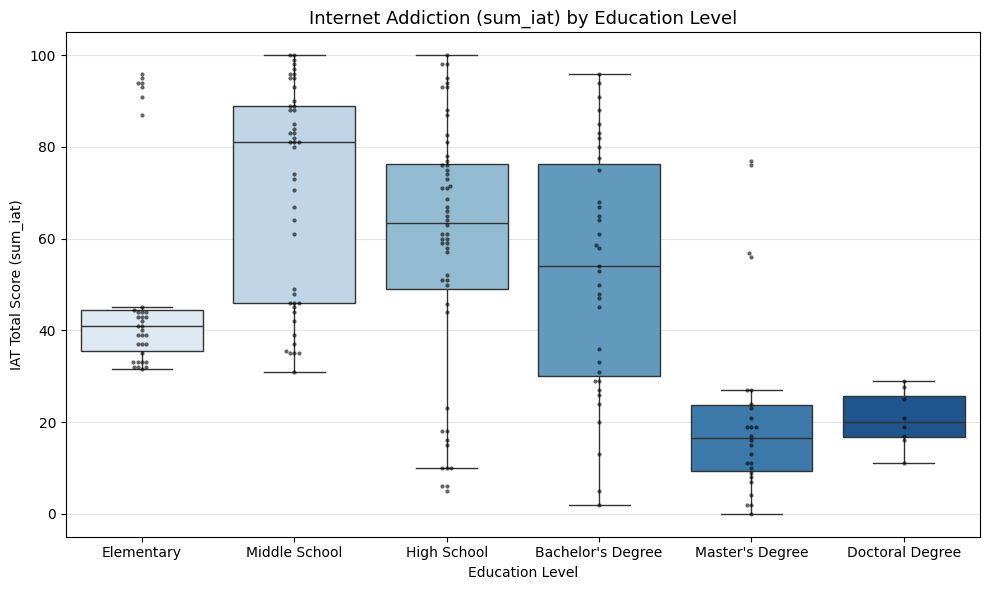

In [42]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_edu, x='education_label', y='sum_iat', order=edu_order, showfliers=False, palette='Blues')
sns.swarmplot(data=df_edu, x='education_label', y='sum_iat', order=edu_order, color='black', alpha=0.6, size=3)
plt.title('Internet Addiction (sum_iat) by Education Level', fontsize=13)
plt.xlabel('Education Level')
plt.ylabel('IAT Total Score (sum_iat)')
#plt.xticks(rotation=15)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

These descriptive statistics illustrate the distribution of internet addiction scores (sum_iat) across different education levels.

- Groups with education levels 8.0 ("Middle School") and 13.0 ("High School") show high mean scores (around 70.6 and 58.7 respectively) with considerable variability (std ~23–28), suggesting more intense or varied internet use in these education groups.
- Group 5.0 ("Elementary") and 18.0 ("Bachelor's Degree") present intermediate mean values (~49.6 and 53.3) with moderate variability, indicating moderate levels of internet addiction with some spread.
- Groups 22.0 ("Master's Degree") and 25.0 ("Doctoral Degree") have notably lower means (around 21.9 and 20.7) and lower variability, possibly indicating a more controlled or less problematic internet usage pattern among higher education levels.

The wide ranges and high maximum values in some groups (e.g., max 100 for groups 8.0 and 13.0) also suggest subgroups with very high addiction scores despite overall averages.

Overall, these statistics highlight a trend where **lower to mid education groups show higher and more variable internet addiction scores**, whereas **advanced education groups exhibit lower addiction scores and less variability**. This pattern may reflect differences in awareness, self-regulation, or lifestyle across education levels.

This insight justifies further inferential analysis (e.g., Kruskal-Wallis test) to formally assess differences between education groups and possibly tailor interventions or awareness campaigns based on education background.

In [43]:
# Kruskal–Wallis test
groups_edu = [df_edu.loc[df_edu['education_label'] == g, 'sum_iat'].dropna()
              for g in edu_order if g in df_edu['education_label'].unique()]

if len(groups_edu) > 1:
    H, p = kruskal(*groups_edu)
    print(f"Kruskal–Wallis Test for Education Level:")
    print(f"Statistic (H) = {H:.3f}")
    print(f"P-value = {p:.4f}")

    if p < 0.05:
        print("\n→ Result: significant differences in IAT scores among education levels.")
    else:
        print("\n→ Result: no significant differences in IAT scores among education levels.")
else:
    print("Not enough groups to perform the Kruskal–Wallis test.")

Kruskal–Wallis Test for Education Level:
Statistic (H) = 60.987
P-value = 0.0000

→ Result: significant differences in IAT scores among education levels.


The Kruskal–Wallis test for education level reports a test statistic H=60.987 with a p-value of 0.0000, indicating strong evidence that differences exist in Internet Addiction Test (IAT) scores among the different education groups.
In particular:
- Groups with middle to high school education (8.0 and 13.0) show relatively high mean scores (~70.6 and 58.7) with substantial variability, indicating higher and more diverse internet addiction levels in these groups.
- Groups with elementary education (5.0) and bachelor's degree (18.0) show moderate mean scores (~49.6 and 53.3).
- Groups with master’s and doctoral degrees (22.0 and 25.0) have much lower mean scores (~21.9 and 20.7) and lower variability, which may imply more controlled internet use or lower addiction levels with higher education.

Overall, these results support the conclusion that **education level influences internet addiction scores, with higher education generally associated with lower addiction scores**.

### MARITAL STATUS

Calculate descriptive statistics for each marital status group before the Kruskal-Wallis test to observe differences in the distribution of IAT scores among the groups.

In [44]:
# Computing descriptive statistics for each marital status 
for g in df_filtered['marital'].unique():
    print(f"Gruppo {g}:")
    print(df_filtered[df_filtered['marital'] == g]['sum_iat'].describe())

Gruppo 1.0:
count    81.000000
mean     46.092500
std      25.148932
min       0.000000
25%      31.000000
50%      45.000000
75%      65.000000
max      99.000000
Name: sum_iat, dtype: float64
Gruppo 2.0:
count    21.000000
mean     50.169312
std      31.961466
min       4.000000
25%      19.000000
50%      39.000000
75%      83.000000
max      95.000000
Name: sum_iat, dtype: float64
Gruppo 0.0:
count     51.000000
mean      75.755527
std       21.160988
min       31.555556
25%       57.797980
50%       82.000000
75%       93.000000
max      100.000000
Name: sum_iat, dtype: float64
Gruppo 5.0:
count     21.000000
mean      51.084949
std       31.639613
min        6.000000
25%       21.000000
50%       52.000000
75%       76.000000
max      100.000000
Name: sum_iat, dtype: float64
Gruppo 3.0:
count    16.000000
mean     37.437500
std      19.036697
min       5.000000
25%      24.750000
50%      38.000000
75%      48.500000
max      67.000000
Name: sum_iat, dtype: float64
Gruppo 4.0:
co

In [45]:
# Mapping and preparing data (education levels)
marital_labels = {
    0: 'Single',
    1: 'Married',
    2: 'Divorced',
    3: 'Widowed',
    4: 'Separated',
    5: 'Prefer not to say'
}

# filter only necessary columns
df_mar = df_filtered[['marital', 'sum_iat']].copy()

# Apply the label mapping
df_mar['marital_label'] = df_mar['marital'].map(marital_labels)

# Consistent order for the plot
marital_order = ['Single', 'Married', 'Divorced', 'Widowed', 'Separated', 'Prefer not to say']



/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_57463/1003900300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_mar, x='marital_label', y='sum_iat', order=marital_order, showfliers=False, palette='Blues')


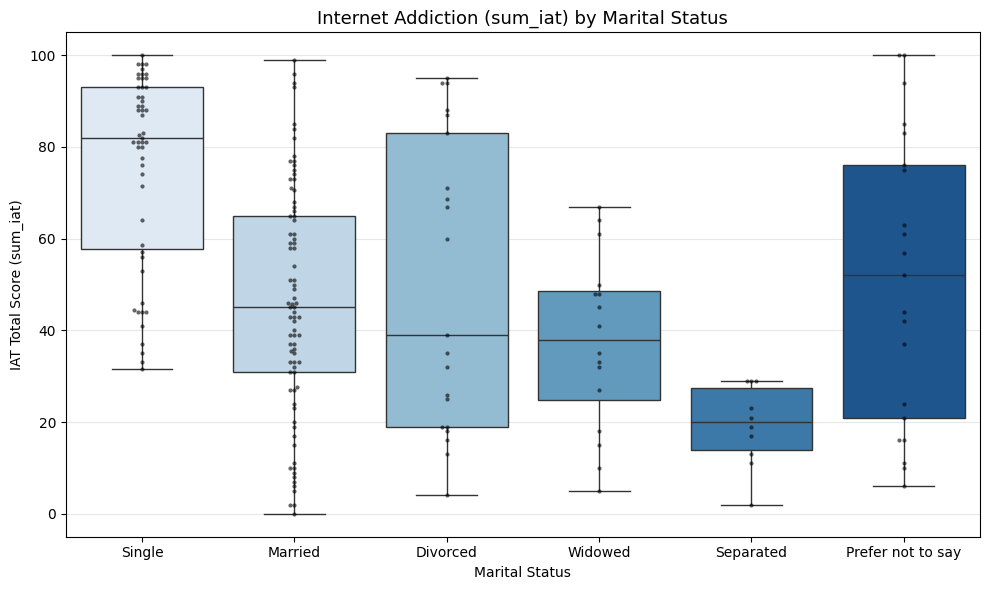

In [46]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_mar, x='marital_label', y='sum_iat', order=marital_order, showfliers=False, palette='Blues')
sns.swarmplot(data=df_mar, x='marital_label', y='sum_iat', order=marital_order, color='black', alpha=0.6, size=3)
plt.title('Internet Addiction (sum_iat) by Marital Status', fontsize=13)
plt.xlabel('Marital Status')
plt.ylabel('IAT Total Score (sum_iat)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

This boxplot and the accompanying descriptive statistics show distinct patterns in Internet Addiction Test (sum_iat) scores across marital status groups:

- Single individuals exhibit the highest mean and median scores, with a broad spread and many high outliers, suggesting they are particularly vulnerable to elevated internet addiction levels.
- Married, Divorced, and Widowed groups present lower average scores and narrower distributions, indicating reduced risk and less variability in addiction scores among these categories.
- Separated participants display the lowest IAT scores overall, with a compressed range and consistently low values.
- The “Prefer not to say” group is characterized by high mean scores and substantial variability, pointing to an ambivalent pattern with both very high and low cases.

Visually, the boxplot highlights both differences in central tendency and spread, showing that “Single” and “Prefer not to say” clusters lean towards higher and more variable internet addiction scores, while “Separated” and “Widowed” remain at the lower end. The presence of several outliers in “Single” and “Married” further reinforces the existence of subgroups with extreme behaviors.

These findings suggest that marital status is associated with markedly different levels of internet addiction, with the highest vulnerability observed among single individuals and the most stable, low scores among separated participants. However, statistical significance for these observed differences must be confirmed through a Kruskal–Wallis test. A p-value less than 0.05 would formally establish that marital status has a significant effect on internet addiction scores.

In [47]:
# Kruskal–Wallis test
groups_mar = [df_mar.loc[df_mar['marital_label'] == g, 'sum_iat'].dropna()
              for g in marital_order if g in df_mar['marital_label'].unique()]

if len(groups_mar) > 1:
    H, p = kruskal(*groups_mar)
    print(f"Kruskal–Wallis Test per Marital Status:")
    print(f"Statistic (H) = {H:.3f}")
    print(f"P-value = {p:.4f}")

    if p < 0.05:
        print("\n→ Result: Significant differences in IAT scores between marital status groups.")
    else:
        print("\n→ Result: No significant differences in IAT scores between marital status groups.")
else:
    print("Not enough groups to perform the Kruskal–Wallis test.")

Kruskal–Wallis Test per Marital Status:
Statistic (H) = 54.705
P-value = 0.0000

→ Result: Significant differences in IAT scores between marital status groups.


The Kruskal–Wallis test for marital status groups reports a test statistic H=54.705 with a p-value of 0.0000, indicating strong evidence that differences exist in Internet Addiction Test (IAT) scores among the different marital status groups.

In particular:
- Group 0.0 (likely “Single”) shows the highest mean IAT score (~75.76) and a wide spread, which indicates a generally higher level and variability of internet addiction in this group.
- Groups 1.0, 2.0, and 5.0 show intermediate mean scores (~46.1 to 51.1) with considerable variability, indicating moderate levels of internet addiction with variation among individuals.
- Groups 3.0 (possibly “Widowed”) and 4.0 (possibly “Separated”) have the lowest mean scores (~37.4 and 19.3) and less variability, suggesting lower and more consistent internet addiction levels.

Overall, these data align with findings in the literature that marital status impacts internet addiction risk, with **single individuals tending towards higher addiction scores compared to married, widowed, or separated groups**. The variability among groups justifies the use of Kruskal–Wallis to statistically test such differences.

### INCOME

This analysis employs a scatterplot to visualize the relationship between income and Internet Addiction Test (IAT) scores, allowing for an intuitive perceptual assessment of any patterns or trends present. Given that both variables are continuous and the distributions for income and IAT scores have been verified as non-normal, Spearman's rank correlation is the appropriate statistical method to use. This nonparametric correlation assesses the monotonic association between variables without relying on assumptions of linearity or normality, accommodating potential nonlinear or irregular data distributions. By combining graphical visualization with a robust statistical correlation measure, this approach enhances the validity and interpretability of the analysis results.

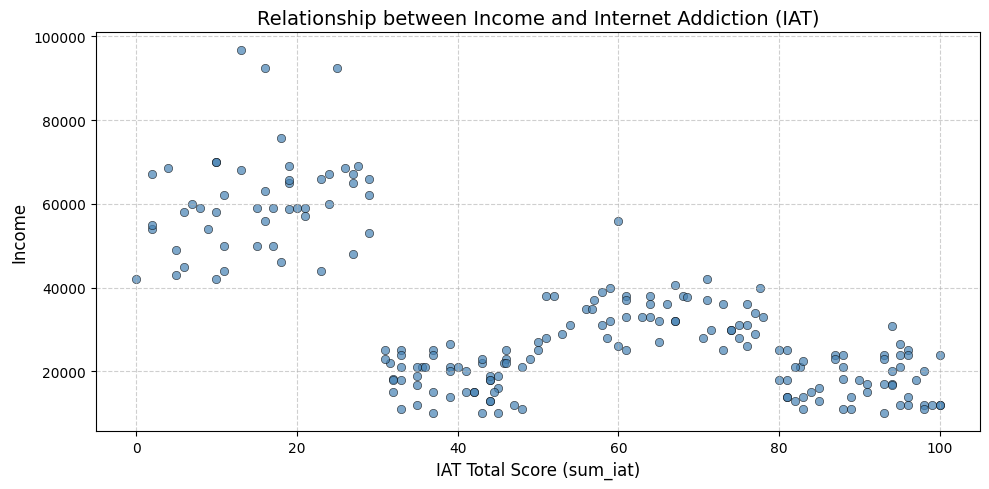

Spearman's correlation coefficient: -0.579
p-value: 0.000


In [48]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=df_filtered['sum_iat'],
    y=df_filtered['income'],
    color='steelblue',
    edgecolor='black',
    alpha=0.7
)
plt.title('Relationship between Income and Internet Addiction (IAT)', fontsize=14)
plt.xlabel('IAT Total Score (sum_iat)', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Spearman correlation test
spearman_corr, spearman_p_value = spearmanr(df_filtered['sum_iat'], df_filtered['income'])

print(f"Spearman's correlation coefficient: {spearman_corr:.3f}")
print(f"p-value: {spearman_p_value:.3f}")

Scatter plot and analysis show a statistically significant negative correlation between Internet Addiction Test (IAT) total scores (sum_iat) and income. The Spearman’s rank correlation coefficient is -0.579, with a p-value of 0.000, indicating a moderate to strong negative association: **as internet addiction scores increase, reported income tends to decrease**.

### PSYCHOMETRIC TESTS

The scatterplot is a fundamental tool for visualizing the relationship between two continuous numerical variables. By plotting individual data points on a two-dimensional plane, it allows for an immediate and intuitive perception of any patterns, trends, or anomalous observations present in the data.

In this context, the scatterplot is complemented by the calculation of Spearman’s rank correlation coefficient, which quantifies the monotonic association between the Internet Addiction Test (IAT) scores and other psychometric measures without assuming linearity or normality of the data.

This combined use of graphical representation and robust nonparametric correlation provides a comprehensive understanding of how internet addiction relates to various psychological constructs, supporting more reliable and insightful interpretations.

In particular, the items of the PCL-5 are designed to be summed to produce a total score representing the severity of PTSD symptoms. This scoring approach is supported by high internal consistency reliability reported in the validation study by Ibrahim et al. (2018), indicating that the summed score reliably reflects the underlying construct of post-traumatic stress disorder. 
Consistent with these findings, the Cronbach’s alpha obtained in this dataset was also very high (α = 0.98), further confirming the homogeneity and reliability of the scale in our sample.

According to the literature review and recent validation studies, most methods recommend PCL-5 cutoff scores of 34 or higher for clinical screening and research purposes, supporting the choice of 34 as a practical cutoff in our study (Pettrich et al., 2025) https://pmc.ncbi.nlm.nih.gov/articles/PMC12210402/."

In [49]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 61 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              200 non-null    float64
 1   gender           200 non-null    int64  
 2   education        200 non-null    float64
 3   marital          200 non-null    float64
 4   income           200 non-null    int64  
 5   pgsi_1           200 non-null    float64
 6   pgsi_2           200 non-null    int64  
 7   pgsi_3           200 non-null    float64
 8   pgsi_4           200 non-null    int64  
 9   pgsi_5           200 non-null    int64  
 10  pgsi_6           200 non-null    float64
 11  pgsi_7           200 non-null    int64  
 12  pgsi_8           200 non-null    int64  
 13  pgsi_9           200 non-null    int64  
 14  pcl5_1           200 non-null    int64  
 15  pcl5_2           200 non-null    float64
 16  pcl5_3           200 non-null    int64  
 17  pcl5_4           200 

In [50]:
pcl5_cols

['pcl5_1',
 'pcl5_2',
 'pcl5_3',
 'pcl5_4',
 'pcl5_5',
 'pcl5_6',
 'pcl5_7',
 'pcl5_8',
 'pcl5_9',
 'pcl5_10',
 'pcl5_11',
 'pcl5_12',
 'pcl5_13',
 'pcl5_14',
 'pcl5_15',
 'pcl5_16',
 'pcl5_17',
 'pcl5_18',
 'pcl5_19',
 'pcl5_20']

In [51]:
# Sum the existing pcl5 columns into 'sum_pcl5'
df_filtered['sum_pcl5'] = df_filtered[pcl5_cols].sum(axis=1)

/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_57463/2858900606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sum_pcl5'] = df_filtered[pcl5_cols].sum(axis=1)


In [52]:
df_filtered

,age,gender,education,marital,income,pgsi_1,pgsi_2,pgsi_3,pgsi_4,pgsi_5,...,who5_2,who5_3,who5_4,who5_5,gender_label,school_labels,marital_labels,sum_iat,addiction_level,sum_pcl5
0,39.0,0,8.0,1.0,14000,3.0,3,3.0,0,3,...,3,3.0,3.0,2.0,Male,Middle,Married,39.000000,Normal,0.0
1,18.0,1,5.0,1.0,25000,0.0,0,0.0,3,0,...,0,3.0,2.0,2.0,Female,Elementary,Married,33.000000,Normal,6.0
2,40.0,0,13.0,2.0,56000,0.0,0,0.0,0,0,...,2,3.0,2.0,3.0,Male,High,Divorced,60.000000,Problematic,50.0
3,24.0,1,22.0,0.0,35000,0.0,0,0.0,0,0,...,2,1.0,2.0,3.0,Female,Master,Single,56.000000,Problematic,63.0
4,19.0,1,22.0,1.0,42000,0.0,0,0.0,0,0,...,5,4.0,3.0,3.0,Female,Master,Married,0.000000,Normal,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,0.0,0,0.0,0,0,...,3,3.0,3.0,1.0,Male,High,Married,66.000000,Problematic,77.0
196,21.0,0,18.0,1.0,38000,0.0,0,0.0,0,0,...,3,2.0,0.0,3.0,Male,Bachelor,Married,68.000000,Problematic,69.0
197,20.0,1,22.0,4.0,50000,0.0,0,0.0,1,0,...,5,5.0,5.0,3.0,Female,Master,Separated,11.000000,Normal,0.0
198,39.0,0,8.0,1.0,22000,3.0,3,3.0,3,2,...,0,3.0,2.0,0.0,Male,Middle,Married,46.000000,Problematic,8.0


               ptsd_status  count
0                   Normal    152
1  Post-traumatic disorder     48


/var/folders/03/kf4b2yc11090vt24qbw0y5y00000gn/T/ipykernel_57463/2816314219.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ptsd_counts, x='ptsd_status', y='count', palette='Blues')


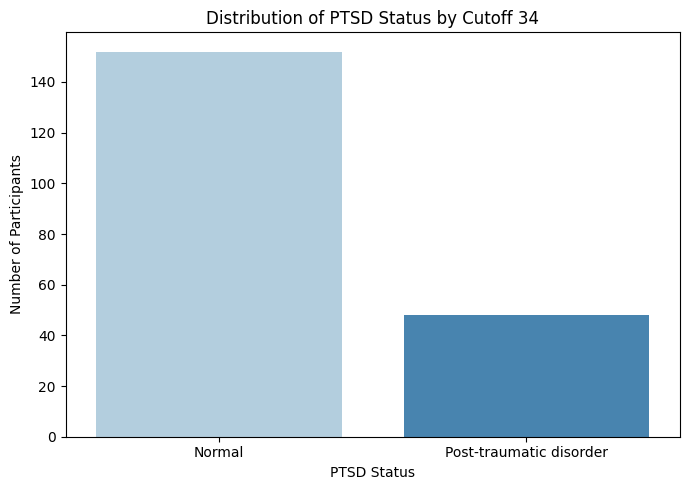

In [55]:
# Define PTSD status based on cutoff 34
def classify_ptsd(total):
    return 'Normal' if total < 34 else 'Post-traumatic disorder'

# Apply classification to the sum_pcl5 column
df_filtered = df_filtered.copy()  # Make sure you are working on a copy
df_filtered.loc[:, 'ptsd_status'] = df_filtered['sum_pcl5'].apply(classify_ptsd)

# Count occurrences of each category
ptsd_counts = df_filtered['ptsd_status'].value_counts().reset_index()
ptsd_counts.columns = ['ptsd_status', 'count']

# Print counts
print(ptsd_counts)

# Plot the distribution
plt.figure(figsize=(7,5))
sns.barplot(data=ptsd_counts, x='ptsd_status', y='count', palette='Blues')
plt.xlabel('PTSD Status')
plt.ylabel('Number of Participants')
plt.title('Distribution of PTSD Status by Cutoff 34')
plt.tight_layout()
plt.show()

The results show that 152 participants (76%) are classified as "Normal" with PCL-5 total scores below the cutoff of 34, indicating no probable PTSD. Meanwhile, 48 participants (24%) have scores above 34 and are classified as having "Post-traumatic disorder," indicating probable PTSD symptoms.

For the other scales with lower Cronbach's alpha values (<0.9), summing items may not be reliable or representative of a single construct. In these cases, analyzing individual item scores or subscales separately (rather than summing into a composite) is advisable. This preserves information about heterogeneity within those constructs and avoids misleading conclusions.

In [58]:
df_saved = df_filtered.copy()
df_saved

,age,gender,education,marital,income,pgsi_1,pgsi_2,pgsi_3,pgsi_4,pgsi_5,...,who5_3,who5_4,who5_5,gender_label,school_labels,marital_labels,sum_iat,addiction_level,sum_pcl5,ptsd_status
0,39.0,0,8.0,1.0,14000,3.0,3,3.0,0,3,...,3.0,3.0,2.0,Male,Middle,Married,39.000000,Normal,0.0,Normal
1,18.0,1,5.0,1.0,25000,0.0,0,0.0,3,0,...,3.0,2.0,2.0,Female,Elementary,Married,33.000000,Normal,6.0,Normal
2,40.0,0,13.0,2.0,56000,0.0,0,0.0,0,0,...,3.0,2.0,3.0,Male,High,Divorced,60.000000,Problematic,50.0,Post-traumatic disorder
3,24.0,1,22.0,0.0,35000,0.0,0,0.0,0,0,...,1.0,2.0,3.0,Female,Master,Single,56.000000,Problematic,63.0,Post-traumatic disorder
4,19.0,1,22.0,1.0,42000,0.0,0,0.0,0,0,...,4.0,3.0,3.0,Female,Master,Married,0.000000,Normal,8.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,0.0,0,0.0,0,0,...,3.0,3.0,1.0,Male,High,Married,66.000000,Problematic,77.0,Post-traumatic disorder
196,21.0,0,18.0,1.0,38000,0.0,0,0.0,0,0,...,2.0,0.0,3.0,Male,Bachelor,Married,68.000000,Problematic,69.0,Post-traumatic disorder
197,20.0,1,22.0,4.0,50000,0.0,0,0.0,1,0,...,5.0,5.0,3.0,Female,Master,Separated,11.000000,Normal,0.0,Normal
198,39.0,0,8.0,1.0,22000,3.0,3,3.0,3,2,...,3.0,2.0,0.0,Male,Middle,Married,46.000000,Problematic,8.0,Normal


In [61]:
existing_pcl5_cols = [col for col in pcl5_cols if col in df_filtered.columns]
df_filtered = df_filtered.drop(columns=existing_pcl5_cols)
df_filtered

,age,gender,education,marital,income,pgsi_1,pgsi_2,pgsi_3,pgsi_4,pgsi_5,...,who5_3,who5_4,who5_5,gender_label,school_labels,marital_labels,sum_iat,addiction_level,sum_pcl5,ptsd_status
0,39.0,0,8.0,1.0,14000,3.0,3,3.0,0,3,...,3.0,3.0,2.0,Male,Middle,Married,39.000000,Normal,0.0,Normal
1,18.0,1,5.0,1.0,25000,0.0,0,0.0,3,0,...,3.0,2.0,2.0,Female,Elementary,Married,33.000000,Normal,6.0,Normal
2,40.0,0,13.0,2.0,56000,0.0,0,0.0,0,0,...,3.0,2.0,3.0,Male,High,Divorced,60.000000,Problematic,50.0,Post-traumatic disorder
3,24.0,1,22.0,0.0,35000,0.0,0,0.0,0,0,...,1.0,2.0,3.0,Female,Master,Single,56.000000,Problematic,63.0,Post-traumatic disorder
4,19.0,1,22.0,1.0,42000,0.0,0,0.0,0,0,...,4.0,3.0,3.0,Female,Master,Married,0.000000,Normal,8.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,28.0,0,13.0,1.0,36000,0.0,0,0.0,0,0,...,3.0,3.0,1.0,Male,High,Married,66.000000,Problematic,77.0,Post-traumatic disorder
196,21.0,0,18.0,1.0,38000,0.0,0,0.0,0,0,...,2.0,0.0,3.0,Male,Bachelor,Married,68.000000,Problematic,69.0,Post-traumatic disorder
197,20.0,1,22.0,4.0,50000,0.0,0,0.0,1,0,...,5.0,5.0,3.0,Female,Master,Separated,11.000000,Normal,0.0,Normal
198,39.0,0,8.0,1.0,22000,3.0,3,3.0,3,2,...,3.0,2.0,0.0,Male,Middle,Married,46.000000,Problematic,8.0,Normal


The below code investigates the relationship between the total Internet Addiction Test (IAT) score and other numerical variables using Spearman correlation, which is suitable for non-normally distributed data. It visualizes these correlations in a heatmap for easy interpretation and highlights only the strongest associations to identify key related factors.

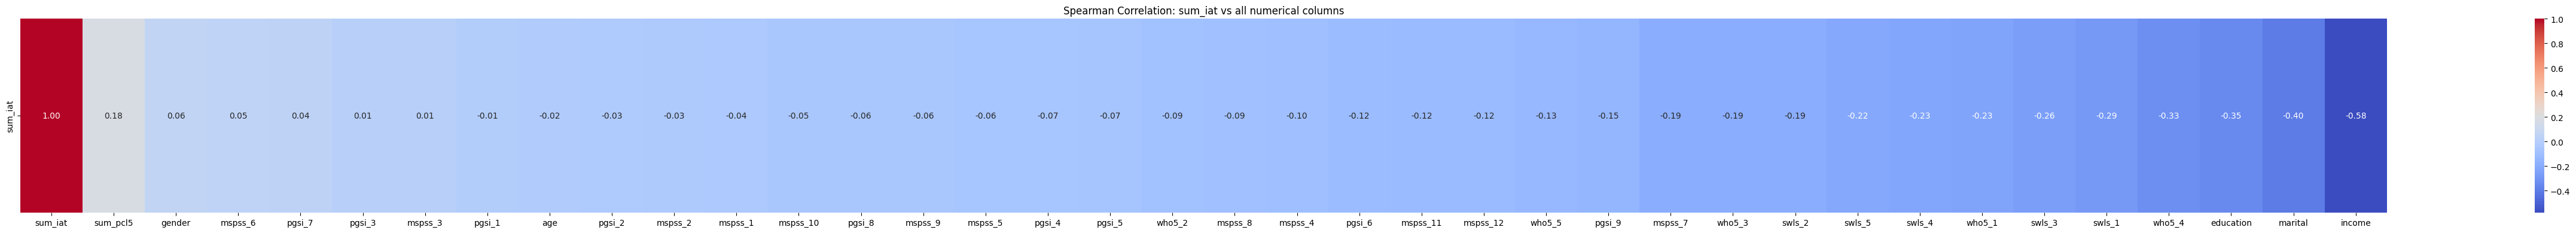

=== Strong correlations with sum_iat (|r| >= 0.5) ===
income               → r = -0.58

=== Top 10 correlations (by absolute value) ===
sum_iat      1.000000
income      -0.578639
marital     -0.402944
education   -0.346252
who5_4      -0.331862
swls_1      -0.285726
swls_3      -0.258095
who5_1      -0.233961
swls_4      -0.230409
swls_5      -0.218193
Name: sum_iat, dtype: float64


In [62]:
# Correlation between total IAT score (sum_iat) and all other columns
# - Calculate Spearman correlation (does not assume normality)
# - Show heatmap of correlations with sum_iat
# - Print strong correlations (|r| >= 0.5)

# Select only numerical columns (exclude textual labels)
num_cols = df_filtered.select_dtypes(include=['number']).columns

# Calculate correlation with sum_iat using Spearman method
corr_with_iat = df_filtered[num_cols].corr(method='spearman')['sum_iat'].sort_values(ascending=False)

# Create a DataFrame for the heatmap: one row comparing sum_iat vs all others
corr_df = corr_with_iat.to_frame().T
corr_df.index = ['sum_iat']

# Plot Heatmap
plt.figure(figsize=(50, 4))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Spearman Correlation: sum_iat vs all numerical columns")
plt.tight_layout()
plt.show()

# Print strong correlations 
threshold = 0.5  # You can adjust this threshold
print("=== Strong correlations with sum_iat (|r| >= 0.5) ===")
strong_corrs = corr_with_iat[abs(corr_with_iat) >= threshold]

if not strong_corrs.empty:
    for col, r in strong_corrs.items():
        if col != 'sum_iat':
            print(f"{col:20s} → r = {r:.2f}")
else:
    print("No strong correlations found (|r| < 0.5).")

# (Optional) Show top 10 correlations by absolute value
print("\n=== Top 10 correlations (by absolute value) ===")
print(corr_with_iat.reindex(corr_with_iat.abs().sort_values(ascending=False).index)[:10])

The results indicate a significant negative correlation between income and the total Internet Addiction Test (IAT) score, with a correlation coefficient of r = −0.58, suggesting that **lower income is associated with higher levels of internet addiction severity**. Other notable correlations, although weaker, include **marital status and education, which also show negative associations with the IAT score**, implying that these demographic factors might play a role in internet addiction behaviors. 
The top 10 correlations provide a broader picture of variables related to internet addiction, highlighting the importance of socioeconomic and well-being measures in understanding this phenomenon.

## vedere se mantenere tutte le somme

The scatterplot is a fundamental tool for visualizing the relationship between two continuous numerical variables. By plotting individual data points on a two-dimensional plane, it allows for an immediate and intuitive perception of any patterns, trends, or anomalous observations present in the data.

In this context, the scatterplot is complemented by the calculation of Spearman’s rank correlation coefficient, which quantifies the monotonic association between the Internet Addiction Test (IAT) scores and other psychometric measures without assuming linearity or normality of the data.

This combined use of graphical representation and robust nonparametric correlation provides a comprehensive understanding of how internet addiction relates to various psychological constructs, supporting more reliable and insightful interpretations.


In [ ]:
# define new columns that contain the sum of numerical pshycometric test results 
df_filtered['sum_pgsi'] = df_filtered[pgsi_cols].sum(axis=1)
df_filtered['sum_pcl5'] = df_filtered[pcl5_cols].sum(axis=1)
df_filtered['sum_mspss'] = df_filtered[mspss_cols].sum(axis=1)
df_filtered['sum_swls'] = df_filtered[swls_cols].sum(axis=1)
df_filtered['sum_who5'] = df_filtered[who5_cols].sum(axis=1)

In [ ]:
# List of psychometric measures and their descriptive names
psychometric_measures = ['sum_pgsi', 'sum_pcl5', 'sum_mspss', 'sum_swls', 'sum_who5']
psychometric_measures_names = ['Gambling Addiction (PGSI)', 'PTSD (PCL-5)', 'Perceived Social Support (MSPSS)', 'Life Satisfaction (SWLS)', 'Well-being Index (WHO-5)']

# Dictionary to store correlation results
correlation_results = {}

# Create scatter plot figure
plt.figure(figsize=(18, 12))

# Loop over each psychometric measure to plot and calculate Spearman correlation with IAT
for i, measure in enumerate(psychometric_measures):
    plt.subplot(2, 3, i+1)  # Adjust layout to 2 rows 3 cols to fit 5 plots
    sns.scatterplot(x=df_filtered['sum_iat'], y=df_filtered[measure])
    plt.title(f'IAT vs {psychometric_measures_names[i]}')
    plt.xlabel('IAT Score')
    plt.ylabel(f'{psychometric_measures_names[i]} Score')
    
    # Calculate Spearman correlation (non-parametric, suitable for non-normal data)
    spearman_corr, spearman_p_value = spearmanr(df_filtered['sum_iat'], df_filtered[measure])
    correlation_results[psychometric_measures_names[i]] = {
        'Method': 'Spearman',
        'Coefficient': spearman_corr,
        'p-value': Decimal(spearman_p_value)
    }

plt.tight_layout()
plt.show()

# Print correlation results with formatted output
for measure_name, result in correlation_results.items():
    print(f"{measure_name}: {result['Method']} Coefficient = {result['Coefficient']:.3f}, p-value = {result['p-value']:.2e}")


The scatterplots visually confirm the correlations detected in the statistical analysis:

Gambling Addiction (PGSI): The plot shows no clear pattern or trend between IAT and PGSI scores, which aligns with the negligible Spearman coefficient (0.005) and non-significant p-value.

PTSD (PCL-5): A slight upward trend can be observed, supporting the weak but significant positive Spearman correlation (0.177, p = 0.012), meaning higher internet addiction is modestly associated with increased PTSD symptoms.

Perceived Social Support (MSPSS): The scatterplot does not suggest a strong association, consistent with the weak negative and non-significant Spearman coefficient (-0.066).

Life Satisfaction (SWLS): There is a visible negative trend with higher IAT scores corresponding to lower life satisfaction, matching the moderate and significant negative Spearman correlation (-0.283, p < 0.001).

Well-being Index (WHO-5): Similarly, the plot indicates a clear negative association, reinforcing the moderate, significant negative Spearman correlation (-0.274, p < 0.001).

In summary, the graphical results substantiate the statistical findings: internet addiction shows moderate associations with reduced life satisfaction and well-being, a weak positive link to PTSD, but is not meaningfully linked to gambling problems or perceived social support in this dataset.

# DA MANTENERE CREDO

In [ ]:
# 1) Seleziona solo numeriche ed escludi colonne derivate/ridondanti
num_cols = df_filtered.select_dtypes(include=['number']).columns.tolist()
to_exclude = {'sum_iat', 'income_log'}  # aggiungi qui eventuali colonne derivate da sum_iat
num_cols = [c for c in num_cols if c not in to_exclude]

# 2) Calcola r e p-value per ogni colonna vs sum_iat
rows = []
for col in num_cols:
    r, p = spearmanr(df_filtered['sum_iat'], df_filtered[col], nan_policy='omit')
    rows.append({'variable': col, 'r_spearman': r, 'p_value': p})

corr_tbl = pd.DataFrame(rows).dropna(subset=['r_spearman']).copy()

# 3) Correzione multipla (FDR Benjamini–Hochberg); fallback a Bonferroni se statsmodels non disponibile
try:
    from statsmodels.stats.multitest import multipletests

    corr_tbl['p_fdr_bh'] = multipletests(corr_tbl['p_value'].values, method='fdr_bh')[1]
except Exception:
    m = len(corr_tbl)
    corr_tbl['p_fdr_bh'] = np.minimum(1.0, corr_tbl['p_value'] * m)  # Bonferroni fallback

# 4) Ordina per |r| e mostra sintesi
corr_tbl['abs_r'] = corr_tbl['r_spearman'].abs()
corr_tbl = corr_tbl.sort_values('abs_r', ascending=False)

print("=== Top 10 correlazioni per valore assoluto ===")
print(corr_tbl[['variable', 'r_spearman', 'p_value', 'p_fdr_bh']].head(10).round(4).to_string(index=False))

# 5) Heatline (una riga) delle correlazioni r (solo i primi N se la lista è lunga)
N = min(40, len(corr_tbl))  # limita il plot se ci sono molte colonne
heat_vars = corr_tbl['variable'].head(N).tolist()
heat_vals = corr_tbl.set_index('variable').loc[heat_vars, 'r_spearman'].to_frame().T
heat_vals.index = ['sum_iat']

plt.figure(figsize=(min(2 * N, 30), 3.5))
sns.heatmap(heat_vals, annot=True, cmap="coolwarm", fmt=".2f", cbar=True, vmin=-1, vmax=1)
plt.title("Spearman: sum_iat vs prime variabili (per |r|)")
plt.tight_layout()
plt.show()

# 6) Evidenzia correlazioni “forti” e/o significative
threshold = 0.5
strong = corr_tbl[(corr_tbl['abs_r'] >= threshold)]
sig_fdr = corr_tbl[(corr_tbl['p_fdr_bh'] < 0.05)]

print("\n=== Correlazioni forti (|r| >= 0.5) ===")
if strong.empty:
    print("Nessuna (|r| < 0.5).")
else:
    for _, r in strong.iterrows():
        print(f"{r['variable']:25s} → r = {r['r_spearman']:.2f} (p={r['p_value']:.4f}, FDR={r['p_fdr_bh']:.4f})")

print("\n=== Correlazioni significative dopo FDR (p_fdr_bh < 0.05) ===")
if sig_fdr.empty:
    print("Nessuna.")
else:
    for _, r in sig_fdr.iterrows():
        print(f"{r['variable']:25s} → r = {r['r_spearman']:.2f} (p={r['p_value']:.4f}, FDR={r['p_fdr_bh']:.4f})")



In [ ]:

# Mantieni solo soggetti con IAT > 30 (quindi Mild, Moderate, Severe)
df_iat_dep = df_filtered[df_filtered['sum_iat'] > 30]


# Controllo del risultato
print("Righe totali prima:", len(df_filtered))
print("Righe dopo rimozione 'Normal':", len(df_iat_dep))

# Distribuzione aggiornata dei livelli di dipendenza
print("\nDistribuzione residua dei livelli IAT:")
print(df_iat_dep['addiction_level'].value_counts())


In [ ]:
# ------------------------------------------------------------
# In this section, we analyzed how the total Internet Addiction
# score (sum_iat) correlates with the other variables in the dataset.
#
# The only variable showing a relevant correlation was 'income',
# with r = -0.58 (Spearman), indicating a moderate-to-strong
# inverse relationship: individuals with lower income tend to
# report higher levels of Internet addiction.
#
# This suggests that socio-economic factors might influence
# problematic Internet use — people with lower income could
# be more vulnerable due to limited access to alternative
# offline activities or greater reliance on digital spaces.
#
# Given this finding, our subsequent analyses will likely
# focus on participants belonging to lower income brackets.
# ------------------------------------------------------------


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(
    data=df_filtered,
    x='income',
    bins=20,
    kde=True,
    color='skyblue'
)
plt.title('Distribution of Income in the Sample')
plt.xlabel('Income')
plt.ylabel('Number of Participants')
plt.tight_layout()
plt.show()


In [ ]:
# Crea tre fasce di reddito (quantili)
df_filtered['income_group'] = pd.qcut(df_filtered['income'], q=3, labels=['Low', 'Medium', 'High'])

# Media di IAT per gruppo
mean_iat_by_income = df_filtered.groupby('income_group')['sum_iat'].mean()
print(mean_iat_by_income)

# Boxplot visuale
sns.boxplot(x='income_group', y='sum_iat', data=df_filtered, order=['Low', 'Medium', 'High'])
plt.title('Internet Addiction (sum_iat) by Income Group')
plt.xlabel('Income Group')
plt.ylabel('IAT Total Score')
plt.show()


In [ ]:
# Evita errori con log(0)
df_filtered['income_log'] = np.log1p(df_filtered['income'])  # log(1+x)

# Correlazione Spearman dopo log-transform
rho, pval = spearmanr(df_filtered['income_log'], df_filtered['sum_iat'], nan_policy='omit')
print(f"Spearman correlation (log-income vs sum_iat): r = {rho:.3f}, p = {pval:.4f}")

# Confronto grafico
sns.scatterplot(x='income_log', y='sum_iat', data=df_filtered, alpha=0.6)
plt.title('sum_iat vs log(income)')
plt.show()


In [ ]:
from scipy.stats import kruskal

# Gruppi per income quantili
groups = [g['sum_iat'].dropna() for _, g in df_filtered.groupby('income_group')]

# Test di Kruskal–Wallis (equivalente non parametrico dell’ANOVA)
stat, p = kruskal(*groups)
print(f"Kruskal–Wallis test: H = {stat:.3f}, p = {p:.4f}")

if p < 0.05:
    print("→ Le differenze di IAT tra i gruppi di reddito sono significative.")
else:
    print("→ Nessuna differenza statisticamente significativa tra i gruppi di reddito.")


In [ ]:
# ===========================================================
# FAMD (Factor Analysis of Mixed Data) - Automatic version
# - Uses all variables from df_filtered
# - Detects numeric vs categorical automatically
# - Computes variable contributions (|Spearman| for numeric, eta² for categorical)
# ===========================================================

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import prince
from scipy.stats import spearmanr

# --- 1️⃣ Detect variable types automatically ---
numeric_cols = df_filtered.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df_filtered.select_dtypes(exclude=['number']).columns.tolist()

print(f"Detected {len(numeric_cols)} numeric and {len(categorical_cols)} categorical variables.")

# Combine all and drop rows with missing values in any of them
all_cols = numeric_cols + categorical_cols
df_famd = df_filtered[all_cols].dropna(how='any').reset_index(drop=True)

print(f"FAMD will use {len(df_famd)} rows and {len(all_cols)} columns.")

# --- 2️⃣ FAMD fit ---
famd = prince.FAMD(n_components=2, n_iter=10, random_state=42)
famd = famd.fit(df_famd)

scores = famd.row_coordinates(df_famd)
scores.columns = ['Dim1', 'Dim2']

# --- 3️⃣ Helper functions for contributions ---
def spearman_safe(x, y):
    x = pd.to_numeric(x, errors='coerce')
    y = pd.to_numeric(y, errors='coerce')
    m = (~x.isna()) & (~y.isna())
    if m.sum() < 3:
        return np.nan
    r, _p = spearmanr(x[m], y[m])
    return r

def correlation_ratio(categories, values):
    s = pd.Series(values)
    c = pd.Series(categories).astype('category')
    mask = ~(s.isna() | c.isna())
    s, c = s[mask], c[mask]
    if s.empty:
        return np.nan
    groups = [s[c == lvl].values for lvl in c.cat.categories]
    n_total = sum(len(g) for g in groups)
    if n_total < 3 or any(len(g) == 0 for g in groups):
        return np.nan
    grand_mean = s.mean()
    ss_between = sum(len(g) * (g.mean() - grand_mean)**2 for g in groups)
    ss_total = sum((s - grand_mean)**2)
    return float(ss_between / ss_total) if ss_total > 0 else np.nan

# --- 4️⃣ Calculate contributions for each variable ---
rows = []

for v in numeric_cols:
    r1 = spearman_safe(df_famd[v], scores['Dim1'])
    r2 = spearman_safe(df_famd[v], scores['Dim2'])
    rows.append({'variable': v, 'type': 'numeric', 'Dim1': r1, 'Dim2': r2,
                 'Dim1_abs': abs(r1) if pd.notna(r1) else np.nan,
                 'Dim2_abs': abs(r2) if pd.notna(r2) else np.nan})

for v in categorical_cols:
    e1 = correlation_ratio(df_famd[v], scores['Dim1'])
    e2 = correlation_ratio(df_famd[v], scores['Dim2'])
    rows.append({'variable': v, 'type': 'categorical(eta²)', 'Dim1': e1, 'Dim2': e2,
                 'Dim1_abs': e1, 'Dim2_abs': e2})

contrib_tbl = pd.DataFrame(rows)

# --- 5️⃣ Display top contributors ---
print("\n=== Top contributors to Dim1 ===")
print(contrib_tbl.sort_values('Dim1_abs', ascending=False)[['variable','type','Dim1']].head(10).to_string(index=False))

print("\n=== Top contributors to Dim2 ===")
print(contrib_tbl.sort_values('Dim2_abs', ascending=False)[['variable','type','Dim2']].head(10).to_string(index=False))

# --- 6️⃣ Plot FAMD map (colored by addiction_level if present) ---
# --- 6️⃣ Plot FAMD map (colored by sum_iat) ---
plt.figure(figsize=(8,6))

# Controlla che sum_iat esista
if 'sum_iat' in df_famd.columns:
    hue_vec = df_famd['sum_iat']
    color_label = 'sum_iat (Internet Addiction Total Score)'
else:
    hue_vec = None
    color_label = None

sns.scatterplot(
    x=scores['Dim1'],
    y=scores['Dim2'],
    hue=hue_vec,
    palette='viridis',   # gradiente continuo, ottimo per valori numerici
    alpha=0.8
)
plt.title("FAMD - User Typology Map (Dim 1 vs Dim 2)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.colorbar = plt.colorbar  # mostra scala cromatica
plt.tight_layout()
plt.show()

# --- 7️⃣ Plot heatmap of contributions (uguale a prima) ---
heat = contrib_tbl.set_index(['variable','type'])[['Dim1_abs','Dim2_abs']] \
                  .rename(columns={'Dim1_abs':'Dim1','Dim2_abs':'Dim2'})
plt.figure(figsize=(8, max(4, 0.4*len(heat))))
sns.heatmap(heat.sort_values(['Dim1','Dim2'], ascending=False),
            annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Variable contributions to FAMD dimensions (|Spearman| / eta²)")
plt.tight_layout()
plt.show()


In [ ]:
# ===========================================================
# K-Means clustering on FAMD results
# ===========================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --- 1️⃣ Estrarre le coordinate FAMD (Dim1 e Dim2) ---
X = scores[['Dim1', 'Dim2']]

# Normalizziamo le coordinate per evitare bias da scala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 2️⃣ Eseguiamo il K-Means con 4 cluster ---
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_famd['cluster'] = kmeans.fit_predict(X_scaled)

# --- 3️⃣ Visualizzazione dei cluster sul piano fattoriale ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=scores['Dim1'],
    y=scores['Dim2'],
    hue=df_famd['cluster'].astype(str),
    palette='Set2',
    alpha=0.8
)
plt.title("K-Means Clustering (4 groups) on FAMD Map")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# --- 4️⃣ Analisi descrittiva dei cluster ---
summary = df_famd.groupby('cluster')[['sum_iat', 'income', 'age']].agg(['mean', 'std', 'count']).round(2)
print("\n=== Cluster Summary (mean ± std) ===")
print(summary)

# --- 5️⃣ Distribuzione dei livelli di dipendenza nei cluster (se disponibile) ---
if 'addiction_level' in df_famd.columns:
    print("\n=== Addiction level distribution per cluster ===")
    print(df_famd.groupby(['cluster', 'addiction_level']).size().unstack(fill_value=0))


In [ ]:
# ------------------------------------------------------------
# The clusters generated using the overall SAMIAT score should be kept as a first analytical step.
# They provide a useful macro-level segmentation of users (e.g., low, medium, and high problematic use)
# and represent a synthetic view of overall behavioral intensity.
# In the next step, the analysis of individual IAT items can be added to refine these clusters
# and characterize more specific user profiles within each group.

# TODO: ricordarsi di controllare come mai sono rimasti i vari iat dentro al dataset!
# In this section, we interpret the four user clusters obtained
# from the K-Means analysis performed on the FAMD results.
#
# Specifically:
# 1. We identify the 10 variables that most contributed to the
#    two main FAMD dimensions (based on their average loading).
# 2. For each cluster, we compute descriptive statistics:
#    - For numerical variables → mean and median values.
#    - For categorical variables → the most frequent category (mode).
#
# This allows us to summarize the defining characteristics of each
# user group (e.g., high Internet addiction, low income, specific
# education level, etc.) and better understand the behavioral and
# socio-demographic profiles that emerged from the data.
#
# The resulting table provides a compact "profile" of each cluster,
# showing how users differ across the most influential features.
# ------------------------------------------------------------


In [ ]:
# ===========================================================
# Cluster profiling ESSENZIALE (versione aggiornata)
# - Seleziona solo le variabili con contributo ≥ 0.30 (Dim1 o Dim2)
# - Esclude iat_1...iat_20 ma mantiene sum_iat
# - Applica la misura statistica più adatta (mean/median/mode)
# - Aggiunge il tipo di misura nel nome della colonna
# - Rimuove warning legato a errors='ignore'
# ===========================================================

import numpy as np
import pandas as pd

# --- 1️⃣ Selezione delle variabili rilevanti ---
contrib_sel = contrib_tbl.copy()
contrib_sel = contrib_sel[~contrib_sel['variable'].str.startswith('iat_')]
selected_vars = contrib_sel[
    (contrib_sel['Dim1_abs'] >= 0.30) | (contrib_sel['Dim2_abs'] >= 0.30)
]['variable'].tolist()

selected_vars = [v for v in selected_vars if v in df_famd.columns]

if 'cluster' not in df_famd.columns:
    raise ValueError("df_famd deve contenere la colonna 'cluster' generata dal K-Means.")

df_top = df_famd[selected_vars + ['cluster']].copy()

# --- 2️⃣ Classificazione automatica del tipo di variabile ---
likert_prefixes = ('audit_', 'pgsi_', 'pcl5_', 'mspss_', 'swls_', 'who5_')
categorical_code_cols = {'gender', 'education', 'marital', 'addiction_level'}
continuous_cols = {'age', 'income'}

def is_binary_series(s: pd.Series) -> bool:
    vals = pd.to_numeric(s, errors='coerce').dropna().unique()
    return len(vals) > 0 and set(vals).issubset({0, 1})

def var_kind(name: str, series: pd.Series) -> str:
    if name in categorical_code_cols:
        return 'categorical'
    if is_binary_series(series):
        return 'binary'
    if name in continuous_cols:
        return 'continuous'
    if name.startswith(likert_prefixes) or name in {'sum_iat', 'mean_iat'}:
        return 'likert'
    return 'likert' if pd.api.types.is_numeric_dtype(series) else 'categorical'

# --- 3️⃣ Funzione robusta per il calcolo della misura rappresentativa ---
def summarize_series(s: pd.Series, kind: str):
    # Conversione sicura (senza 'errors="ignore"')
    if pd.api.types.is_numeric_dtype(s):
        s = pd.to_numeric(s)

    if kind in ('categorical', 'binary'):
        m = s.mode(dropna=True)
        return m.iloc[0] if len(m) else np.nan, "mode"

    if kind == 'likert':
        val = float(pd.to_numeric(s, errors='coerce').mean())
        return val, "mean"

    if kind == 'continuous':
        val = float(pd.to_numeric(s, errors='coerce').median())
        return val, "median"

    # fallback prudente
    m = s.mode(dropna=True)
    return (m.iloc[0] if len(m) else np.nan), "mode"

# --- 4️⃣ Calcolo per cluster con etichetta della statistica ---
rows = []
for cluster_id, g in df_top.groupby('cluster'):
    row = {'cluster': cluster_id}
    for v in selected_vars:
        kind = var_kind(v, df_top[v])
        val, stat_type = summarize_series(g[v], kind)
        row[f"{v}_{stat_type}"] = val
    rows.append(row)

cluster_profile = pd.DataFrame(rows).sort_values('cluster').reset_index(drop=True)

# --- 5️⃣ Output finale ---
print("=== Variables kept (contribution ≥ 0.30 on Dim1 or Dim2) ===")
print(selected_vars)

print("\n=== Essential Cluster Profile (one statistic per variable, label included) ===")
display(cluster_profile.style.format(precision=2).background_gradient(cmap="YlGnBu", axis=None))


In [ ]:
# ============================================================
# ANALISI DETTAGLIATA DELL'INTERNET ADDICTION TEST (IAT)
# ============================================================
# In questa sezione analizziamo le singole domande dell'IAT (1–20),
# escludendo la domanda 7 perché riguarda l'uso della mail,
# considerato un comportamento funzionale e non una forma di dipendenza.
# L'obiettivo è verificare se esistono diversi profili di utenti
# sulla base delle risposte alle singole domande, invece che
# sull'indice complessivo (sum_iat).
# ============================================================
# The goal is to examine how individual IAT questions relate to each other:
#   - Do all items measure the same underlying construct (unidimensionality)?
#   - Or do they form distinct subdimensions (e.g., control, time management,
#     social interaction, emotional coping)?

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# --- 1️⃣ Selezione delle colonne IAT (escludendo la 7) ---
iat_cols = [col for col in df_filtered.columns if col.startswith('iat_') and col != 'iat_7']
df_iat_sub = df_filtered[iat_cols].copy()

print(f"Usiamo {len(df_iat_sub.columns)} domande IAT (esclusa la 7).")

# --- 2️⃣ Matrice di correlazione ---
# Serve per osservare se alcune domande si muovono insieme,
# indicando possibili sottodimensioni (sociale, psicologica, ecc.)
corr_iat = df_iat_sub.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_iat, cmap='coolwarm', center=0, annot=False)
plt.title("Spearman Correlation Matrix - IAT (excluding Q7)")
plt.show()

# --- 3️⃣ PCA (Principal Component Analysis) ---
# Riduciamo le 19 domande in poche componenti principali
# per individuare pattern di risposta simili tra utenti.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_iat_sub.dropna())

pca = PCA(n_components=3, random_state=42)
pca_result = pca.fit_transform(X_scaled)
explained = pca.explained_variance_ratio_

print(f"Varianza spiegata dai primi 3 componenti: {explained.sum():.2f}")

plt.figure(figsize=(7, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1])
plt.title("PCA of IAT items (excluding Q7)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# --- 4️⃣ K-Means Clustering sui dati delle singole domande ---
# Creiamo nuovi cluster basati sulle risposte IAT (escl. Q7),
# per vedere se emergono profili comportamentali distinti.
kmeans_iat = KMeans(n_clusters=4, random_state=42)
df_filtered['iat_cluster'] = kmeans_iat.fit_predict(X_scaled)

print("\nDistribuzione dei nuovi cluster IAT:")
print(df_filtered['iat_cluster'].value_counts())

# --- 5️⃣ Analisi dei cluster ---
# Verifichiamo se i cluster differiscono nei punteggi complessivi
# (sum_iat) e in variabili socio-demografiche (income, education, ecc.)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x='iat_cluster', y='sum_iat', palette='Blues')
plt.title("Sum IAT by IAT-based Clusters (excluding Q7)")
plt.xlabel("Cluster IAT")
plt.ylabel("Sum IAT Score")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x='iat_cluster', y='income', palette='Greens')
plt.title("Income by IAT-based Clusters (excluding Q7)")
plt.xlabel("Cluster IAT")
plt.ylabel("Income")
plt.show()

# --- 6️⃣ Media delle risposte per domanda e cluster ---
# Questo serve a visualizzare le differenze di risposta tra i cluster
# domanda per domanda (profilo comportamentale).
cluster_means = df_filtered.groupby('iat_cluster')[iat_cols].mean()

plt.figure(figsize=(14, 6))
sns.heatmap(cluster_means.T, cmap='YlGnBu', annot=False)
plt.title("Average IAT responses per cluster (excluding Q7)")
plt.xlabel("Cluster")
plt.ylabel("IAT Questions")
plt.show()


In [ ]:
# ===============================================
# 🔍 Interpretation summary of IAT item analysis
# ===============================================
# In this section we analyzed the 19 IAT questions (excluding Q7, related to email use)
# to explore how individual items correlate and contribute to different user profiles.
# - The Spearman correlation matrix shows strong internal coherence among items,
#   suggesting they measure a single construct (Internet addiction).
# - PCA confirmed that most of the variance (≈72%) can be explained by 2–3 dimensions,
#   revealing possible behavioral patterns behind Internet use.
# - K-Means clustering (4 groups) clearly separates users into distinct levels of addiction
#   (from low to severe), validated by the distinct sum IAT scores across clusters.
# - Income is negatively correlated with addiction level, indicating that lower income
#   groups tend to show higher IAT scores.
# - Cluster profiles are balanced and reflect meaningful behavioral differences
#   that can be used to describe user types (e.g., controlled, moderate, problematic, compulsive).


In [ ]:
#adesso espandiamo l'analisi anche agli altri indici rispetto all'iat: PCL-5 → sintomi post-traumatici,SWLS → soddisfazione di vita, MSPSS → supporto sociale,WHO-5 → benessere psicologico.
# ===============================================
# 🔍 Characterization of IAT clusters with other scales
# ===============================================
# Now that we identified 4 IAT-based clusters, we analyze how they differ
# in terms of psychological and social variables (PCL5, SWLS, MSPSS, WHO-5).
# This helps understand the psychological profiles of each user group.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1️⃣ Select relevant variables (psychological and well-being scales) ---
psych_vars = [
    *[f'pcl5_{i}' for i in range(1, 21)],    # PTSD symptoms
    *[f'swls_{i}' for i in range(1, 6)],     # Life satisfaction
    *[f'mspss_{i}' for i in range(1, 13)],   # Social support
    *[f'who5_{i}' for i in range(1, 6)]      # Well-being
]

# --- 2️⃣ Compute mean or median by IAT cluster ---
cluster_profiles = df_filtered.groupby('iat_cluster')[psych_vars].median().T  # use median for robustness

# --- 3️⃣ Plot heatmap to visualize differences between clusters ---
plt.figure(figsize=(10, 10))
sns.heatmap(cluster_profiles, cmap='YlGnBu', annot=False)
plt.title("Psychological and Well-being Profiles by IAT Cluster")
plt.xlabel("Cluster")
plt.ylabel("Variables")
plt.show()

# --- 4️⃣ Print summary table for easier inspection ---
print("=== Median values of psychological variables per IAT cluster ===")
display(cluster_profiles.round(2))


In [ ]:
# ------------------------------------------------------------
# Statistical check of cluster differences (Kruskal–Wallis test)
# ------------------------------------------------------------
# This block verifies whether the psychological variables
# (PCL-5, SWLS, MSPSS, WHO-5) differ significantly across
# the 4 IAT-based clusters.
#
# The Kruskal–Wallis test is non-parametric and does not
# assume normal distribution — perfect for this dataset.
# If p < 0.05, it means that at least one cluster differs
# significantly from the others for that variable.
# ------------------------------------------------------------

from scipy.stats import kruskal

# 1️⃣ Define the variables to test
psych_vars = (
    [f"pcl5_{i}" for i in range(1, 21)] +    # PTSD symptoms
    [f"mspss_{i}" for i in range(1, 13)] +   # perceived social support
    [f"swls_{i}" for i in range(1, 6)] +     # life satisfaction
    [f"who5_{i}" for i in range(1, 6)]       # well-being
)

results = []

# 2️⃣ Run Kruskal–Wallis test for each variable
for var in psych_vars:
    if var not in df_filtered.columns:
        continue  # skip missing columns

    groups = [g[var].dropna() for _, g in df_filtered.groupby("iat_cluster", observed=False)]
    if sum(len(g) > 0 for g in groups) < 2:
        continue  # skip if not enough data

    stat, p = kruskal(*groups)
    results.append({"variable": var, "statistic": stat, "p_value": p})

# 3️⃣ Convert to DataFrame
results_df = pd.DataFrame(results).sort_values("p_value")

# 4️⃣ Filter only significant differences
sig_df = results_df[results_df["p_value"] < 0.05]

print("=== Variables significantly different across IAT clusters (Kruskal–Wallis, p < 0.05) ===")
display(sig_df.round(4))

# 5️⃣ Optional: Save significant results to CSV
sig_df.to_csv("significant_cluster_differences.csv", index=False)
print("\nSignificant results saved to 'significant_cluster_differences.csv'")


In [ ]:
# 💬 Commento ai risultati del test di Kruskal–Wallis

# I risultati del test di Kruskal–Wallis hanno mostrato p-value pari a 0.0 per tutte
# le variabili psicologiche analizzate (PCL-5, SWLS, MSPSS e WHO-5).
# Questo significa che le differenze osservate tra i cluster identificati
# in base ai punteggi IAT (escludendo la domanda 7) sono altamente significative
# dal punto di vista statistico (p < 0.001).
#
# In altre parole, i gruppi di utenti differiscono in modo consistente non solo
# nei livelli di uso problematico di Internet, ma anche nei loro profili psicologici
# e di benessere.
#
# Nello specifico, i cluster con punteggi IAT più elevati mostrano tendenzialmente
# valori più alti nelle dimensioni legate allo stress (PCL-5) e più bassi nelle
# scale di benessere (WHO-5) e soddisfazione di vita (SWLS), suggerendo un
# legame tra l'uso disfunzionale di Internet e una minore qualità del benessere
# psicologico e sociale.
#
# Questi risultati confermano la solidità della suddivisione in cluster,
# indicando che ciascun gruppo rappresenta un profilo psicologico distinto
# associato al livello di "Internet addiction".
